<a href="https://colab.research.google.com/github/panosppkn/Machine-learning-techniques-for-startup-success-prediction/blob/main/startupPrediction_ipnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title**
Data-mining and machine learning techniques for startup success prediction.

*A tool for investors*

Steps:
1. Explore the dataset and visualizations
2. Choose and transform features in order to create useful datasets
3. Use ML models (Random Forests, KNNs) to predict success (acquisition or IPO) of the companies (binary classification)

# Documentation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go


## Function for providing summary in dataframe
%matplotlib inline

def funding_information(data,round,name):
    company = data[data['name'] == name]
    rounds = round[round['company_name'] == name]
    print ("Company : ", name)
    print ("Total Funding : ", company.funding_total_usd.values[0] , " $")
    try:
      print ("Seed Funding : ", rounds[rounds['funding_round_type'] == "seed"].raised_amount_usd.sum() , " $")    
    except IndexError:
      print ("Seed Funding : 0 $")

    try:
      print ("Angle Funding :",  rounds[rounds['funding_round_type'] == "angel"].raised_amount_usd.sum(), " $")
    except IndexError:
      print ("Angle Funding : 0 $")


    try:
      print ("Debt Financing :",  rounds[rounds['funding_round_type'] == "debt_financing"].raised_amount_usd.sum(), " $")
    except IndexError:
      print ("Debt Financing : 0 $")

    try:
      print ("Private Equity :",  rounds[rounds['funding_round_type'] == "private_equity"].raised_amount_usd.sum(), " $")
    except IndexError:
      print ("Private Equity : 0 $")

    # try:
    #   print ("PostIPO Equity :",  , " $")
    # except IndexError:
    #   print ("PostIPO Equity : 0 $")

    # try:
    #   print ("PostIPO Debt :",  , " $")
    # except IndexError:
    #   print ("PostIPO Debt : 0 $")

    # try:
    #   print ("Secondary Market :",  , " $")
    # except IndexError:
    #   print ("Secondary Market : 0 $")

    try:
      print ("Venture Funding :",  rounds[rounds['funding_round_type'] == "venture"].raised_amount_usd.sum(), " $")
    except IndexError:
      print ("Venture Funding : 0 $")

    try:
      print ("Round A funding :",  rounds[rounds['funding_round_code'] == "A"].raised_amount_usd.sum(), " $")
    except IndexError:
      print ("Round A funding : 0 $")

    try:
      print ("Round B funding :",  rounds[rounds['funding_round_code'] == "B"].raised_amount_usd.sum(), " $")
    except IndexError:
      print ("Round B funding : 0 $")

    try:
      print ("Round C funding :",  rounds[rounds['funding_round_code'] == "C"].raised_amount_usd.sum(), " $")
    except IndexError:
      print ("Round C funding : 0 $")

    try:
      print ("Round D funding :",  rounds[rounds['funding_round_code'] == "D"].raised_amount_usd.sum(), " $")
    except IndexError:
      print ("Round D funding : 0 $")

    try:
      print ("Round E funding :",  rounds[rounds['funding_round_code'] == "E"].raised_amount_usd.sum(), " $")
    except IndexError:
      print ("Round E funding : 0 $")

    try:
      print ("Round F funding :",  rounds[rounds['funding_round_code'] == "F"].raised_amount_usd.sum(), " $")
    except IndexError:
      print ("Round F funding : 0 $")

    try:
      print ("Round G funding :",  rounds[rounds['funding_round_code'] == "G"].raised_amount_usd.sum(), " $")
    except IndexError:
      print ("Round G funding : 0 $")

    try:
      print ("Round H funding :",  rounds[rounds['funding_round_code'] == "H"].raised_amount_usd.sum(), " $")
    except IndexError:
      print ("Round H funding : 0 $")


    return rounds   

##Αcquisitions

In [ ]:
acquisitions = pd.read_csv('acquisitions.csv')
acquisitions.head()

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,acquirer_permalink,acquirer_name,acquirer_category_list,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,acquired_at,acquired_month,price_amount,price_currency_code
0,/organization/003-ru,003.RU,Consumer Electronics|Electronics|Internet,RUS,48,Moscow,Moscow,/organization/media-saturn,Media Saturn,Enterprise Software|Media|Sales and Marketing,ESP,56,Barcelona,Barcelona,2012-07-23,2012-07,NaN,USD
1,/organization/0958572-b-c-ltd,0958572 B.C. Ltd.,NaN,NaN,NaN,NaN,NaN,/organization/atlas-intellectual-property-mana...,ATLAS Intellectual Property Management Co.,Finance|FinTech|Mobile|Telecommunications,USA,WA,Seattle,Seattle,2012-02-02,2012-02,9000000.0,USD
2,/organization/1-800-communications,1-800 Communications,NaN,USA,NY,Long Island,Hicksville,/organization/carsdirect-com,CarsDirect.com,E-Commerce,USA,CA,Los Angeles,El Segundo,2005-06-12,2005-06,NaN,USD
3,/organization/1-800-contacts,1-800 Contacts,Consumer Goods|Retail,USA,UT,Salt Lake City,Draper,/organization/thomas-h-lee-partners,Thomas H. Lee Partners,Business Development|Impact Investing|Investme...,USA,MA,Boston,Boston,2014-01-07,2014-01,NaN,USD
4,/organization/1-844-446-4460-pogo-customer-ser...,Games Support +1-800-311-5934 Pogo Games techn...,NaN,NaN,NaN,NaN,NaN,/organization/pogo-customer-service-number-1-8...,Games Support +1-800-311-5934 Pogo Games techn...,NaN,USA,NY,New York City,Mamaroneck,2001-02-02,2001-02,NaN,USD


Μέγεθος πίνακα και σύνολο κενών τιμών

In [ ]:
print("shape =",acquisitions.shape)
print("sum of NaN values =",acquisitions.isnull().sum().sum())

shape = (18968, 18)
sum of NaN values = 46118


Πληροφορίες πίνακα

In [ ]:
print( acquisitions.columns.values )

['company_permalink' 'company_name' 'company_category_list'
 'company_country_code' 'company_state_code' 'company_region'
 'company_city' 'acquirer_permalink' 'acquirer_name'
 'acquirer_category_list' 'acquirer_country_code' 'acquirer_state_code'
 'acquirer_region' 'acquirer_city' 'acquired_at' 'acquired_month'
 'price_amount' 'price_currency_code']


## Αcquirer

create Acquirers

In [ ]:
acquirers = acquisitions['acquirer_permalink'].unique()
acquirers = pd.DataFrame(acquirers, columns = ['acquirer_permalink'])
acquirers["acquirered_companies"] = 0
acquirers["average_acquisitions"] = 0
acquirers["acquirered_successes"] = 0
acquirers.head()

,acquirer_permalink,acquirered_companies,average_acquisitions,acquirered_successes
0,/organization/media-saturn,0,0,0
1,/organization/atlas-intellectual-property-mana...,0,0,0
2,/organization/carsdirect-com,0,0,0
3,/organization/thomas-h-lee-partners,0,0,0
4,/organization/pogo-customer-service-number-1-8...,0,0,0


In [ ]:
print("shape =", acquirers.shape)
print("sum of NaN values =", acquirers.isnull().sum().sum())

shape = (9489, 4)
sum of NaN values = 0


Edit *acquirered_companies*, *average_acquisitions* on *acquirers*

In [ ]:
for i in range(9489):
  acquirer_name = acquirers.iloc[i, 0]
  temp = acquisitions[acquisitions['acquirer_permalink']==acquirer_name]
  r = len(temp['company_permalink'].unique())
  acquirers.iloc[i, 1] = r
  acquirers.iloc[i, 2] = temp.shape[0]/r
acquirers.head()

,acquirer_permalink,acquirered_companies,average_acquisitions,acquirered_successes
0,/organization/media-saturn,1,1.0,0
1,/organization/atlas-intellectual-property-mana...,4,1.0,0
2,/organization/carsdirect-com,1,1.0,0
3,/organization/thomas-h-lee-partners,9,1.0,0
4,/organization/pogo-customer-service-number-1-8...,1,1.0,0


acquirered_successes

In [ ]:
for i in range(9489):
  acquirer_name = acquirers.iloc[i, 0]
  df = acquisitions[acquisitions['acquirer_permalink']==acquirer_name]
  rows, _ = df.shape
  successful=0
  for j in range(rows):
    company_name = df.iloc[j, 0]
    temp = companies[companies['permalink']==company_name]
    if temp.shape[0] == 0:
      continue
    status = temp.iloc[0, 5]
    if status == 'acquired' or status == 'ipo':
      successful += 1
  acquirers.iloc[i, 3] = successful
acquirers.head()

,acquirer_permalink,acquirered_companies,average_acquisitions,acquirered_successes
0,/organization/media-saturn,1,1.0,0
1,/organization/atlas-intellectual-property-mana...,4,1.0,0
2,/organization/carsdirect-com,1,1.0,0
3,/organization/thomas-h-lee-partners,9,1.0,0
4,/organization/pogo-customer-service-number-1-8...,1,1.0,0


In [ ]:
acquirers['acquirered_successes'].value_counts()

0     6281
1     2383
2      454
3      157
4       75
5       42
6       23
7       15
9        9
8        6
16       5
13       5
12       5
10       4
19       3
28       3
24       2
15       2
55       2
11       1
86       1
34       1
18       1
62       1
27       1
17       1
47       1
20       1
21       1
37       1
14       1
70       1
Name: acquirered_successes, dtype: int64

if acquirer's results are weird put its permalink below

In [ ]:
df = acquisitions[acquisitions['acquirer_permalink']=='/organization/media-saturn']
rows, _ = df.shape
for j in range(rows):
  company_name = df.iloc[j, 0]
  print(company_name)
  temp = companies[companies['permalink']==company_name]
  if j == 0:
    k = temp
  else:
    k = k.append(temp)
k.head()

/organization/003-ru
Empty DataFrame
Columns: [permalink, name, homepage_url, category_list, funding_total_usd, status, country_code, state_code, region, city, funding_rounds, founded_at, first_funding_at, last_funding_at]
Index: []


,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at


In [ ]:
temp = companies[companies['permalink']=='/organization/003-ru']
temp.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at


In [ ]:
k.shape

(167, 14)

In [ ]:
k['status'].value_counts()

operating    156
closed        11
Name: status, dtype: int64

In [ ]:
df.shape

(114, 18)

In [ ]:
from google.colab import files

acquirers.to_csv('acquirers.csv')
files.download('acquirers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Αdditions

In [ ]:
additions = pd.read_csv('additions.csv')
additions.head()

,content,month_str,year_str,value
0,Acquisitions,1960-01,1960,1
1,Acquisitions,1966-11,1966,1
2,Acquisitions,1967-04,1967,1
3,Acquisitions,1972-01,1972,1
4,Acquisitions,1973-01,1973,1


In [ ]:
print("shape =",additions.shape)
print("sum of NaN values =",additions.isnull().sum().sum())

shape = (2213, 4)
sum of NaN values = 0


In [ ]:
additions['content'].value_counts()

IPOs                             436
Acquisitions                     300
Profiles: Organizations          104
Rounds                           104
Rounds: angel                    104
Profiles: Products               104
Rounds: venture                  104
Profiles: People                 104
Profiles                         104
Rounds: seed                     103
Rounds: debt_financing           100
Rounds: undisclosed               95
Rounds: private_equity            92
Rounds: grant                     85
Rounds: post_ipo_equity           57
Rounds: convertible_note          54
Rounds: equity_crowdfunding       45
Rounds: product_crowdfunding      38
Rounds: post_ipo_debt             29
Rounds: secondary_market          27
Rounds: non_equity_assistance     24
Name: content, dtype: int64

##Companies

In [ ]:
companies = pd.read_csv('companies.csv')
companies.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


###Status

In [ ]:
companies['status'].value_counts()

operating    53034
closed        6238
acquired      5549
ipo           1547
Name: status, dtype: int64

In [ ]:
companies['funding_total_usd'].isna().sum()

0

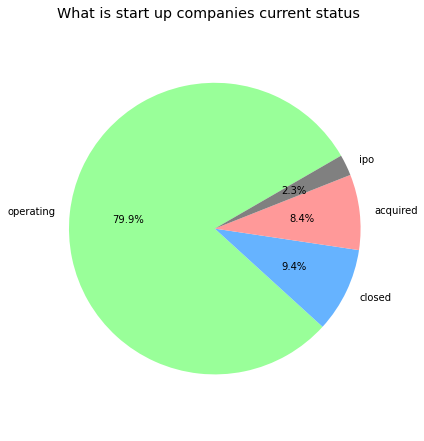

In [ ]:
plt.rcParams['figure.figsize'] = 6,6
labels = companies['status'].value_counts().index.tolist()
sizes = companies['status'].value_counts().tolist()
explode = (0, 0, 0, 0)
colors = ['#99ff99','#66b3ff','#ff9999','grey']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=30)
plt.axis('equal')
plt.tight_layout()
plt.title("What is start up companies current status", fontdict=None, position= [0.48,1], size = 'x-large')
plt.show()

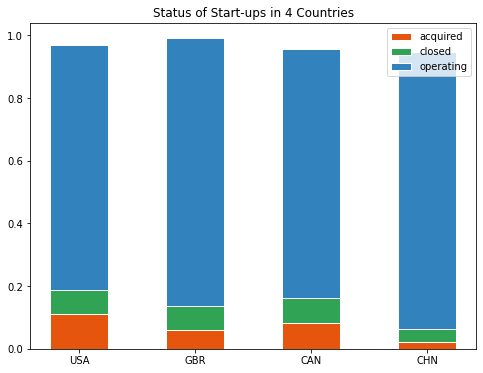

In [ ]:
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
plt.figure(figsize=(8,6))
status_cont=companies.groupby('country_code')['status'].value_counts(normalize=True)
cont=['USA','GBR','CAN','CHN']
status_cont=status_cont.loc[cont].unstack().T
plt.bar(status_cont.columns,status_cont.loc['acquired'],color=outer_colors[1],label='acquired',width=0.5,edgecolor='w')
plt.bar(status_cont.columns,status_cont.loc['closed'],bottom=status_cont.loc['acquired'],color=outer_colors[2],label='closed',width=0.5,edgecolor='w')
plt.bar(status_cont.columns,status_cont.loc['operating'],bottom=status_cont.loc['closed']+status_cont.loc['acquired'],color=outer_colors[0],label='operating',width=0.5,edgecolor='w')
plt.legend()
plt.title('Status of Start-ups in 4 Countries')
plt.show()

### Acquired

In [ ]:
ac = companies[companies['status']=='acquired']
ac = ac.dropna(subset=['founded_at'])
ac.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,5000000,acquired,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,500000,acquired,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15
23,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,2535000,acquired,USA,CA,SF Bay Area,San Francisco,2,2010-07-01,2010-01-01,2011-02-16
31,/organization/100plus,100Plus,http://www.100plus.com,Analytics,1250000,acquired,USA,CA,SF Bay Area,San Francisco,2,2011-09-16,2011-11-02,2011-11-30
32,/organization/1010data,1010data,http://www.1010data.com,Software,35000000,acquired,USA,NY,New York City,New York,1,2000-01-01,2010-03-08,2010-03-08


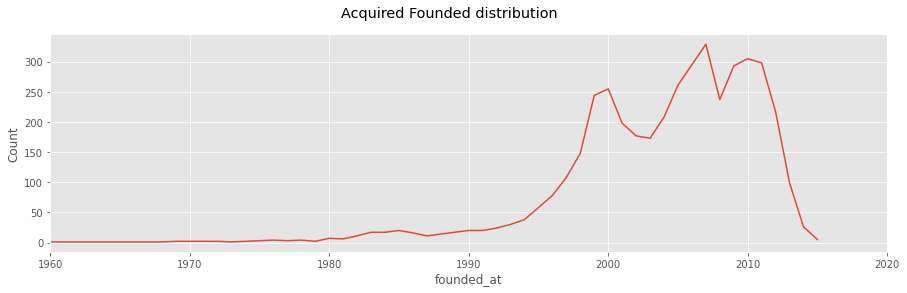

In [ ]:
plt.rcParams['figure.figsize'] = 15,4
ac['founded_at'] = pd.to_datetime(ac['founded_at'], errors='coerce')
ac['permalink'].groupby(ac["founded_at"].dt.year).count().plot(kind="line")

plt.ylabel('Count')
plt.title("Acquired Founded distribution ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.xlim(1960, 2020)
plt.show()

In [ ]:
companies['founded_at'].isna().sum()

15221

In [ ]:
print("shape =", companies.shape)
print("sum of NaN values =", companies.isnull().sum().sum())

shape = (66368, 14)
sum of NaN values = 55015


### IPO

In [ ]:
ipo = companies[companies['status']=='ipo']
ipo = ipo.dropna(subset=['founded_at'])
ipo.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
139,/organization/21vianet,21viaNet,http://www.ch.21vianet.com,Software|Web Hosting,396000000,ipo,CHN,22,Beijing,Beijing,5,2009-10-16,2008-02-13,2014-12-04
140,/organization/22nd-century-group,22nd Century Group,http://www.xxiicentury.com,Biotechnology,15034750,ipo,USA,NY,NY - Other,Clarence,6,1998-01-01,2010-12-28,2014-09-18
201,/organization/2u,2U Inc.,http://2u.com,EdTech|Education|Software,95875000,ipo,USA,MD,MD - Other,Hyattsville,6,2008-01-01,2009-03-25,2013-10-21
270,/organization/3d-systems,3D Systems,http://www.3dsystems.com,Software,169500000,ipo,USA,SC,SC - Other,Rock Hill,3,1986-01-01,2014-01-15,2014-10-13
436,/organization/58-com,58.com,http://www.58.com,Curated Web|Internet|Software,876780000,ipo,CHN,19,CHN - Other,Chaoyang,6,2005-01-01,2006-02-01,2014-06-27


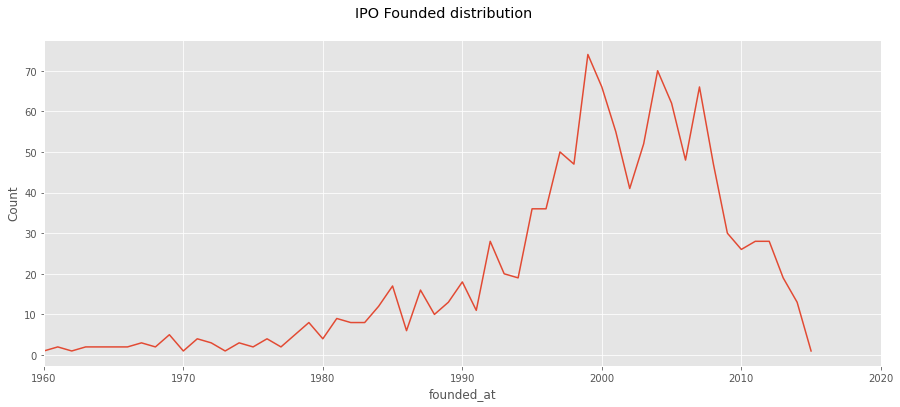

In [ ]:
plt.rcParams['figure.figsize'] = 15,6
ipo['founded_at'] = pd.to_datetime(ipo['founded_at'], errors='coerce')
ipo['permalink'].groupby(ipo["founded_at"].dt.year).count().plot(kind="line")

plt.ylabel('Count')
plt.title("IPO Founded distribution ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.xlim(1960, 2020)
plt.show()

In [ ]:
companies['founded_at'].isna().sum()

15221

In [ ]:
print("shape =", companies.shape)
print("sum of NaN values =", companies.isnull().sum().sum())

shape = (66368, 14)
sum of NaN values = 55015


###Market

In [ ]:
len(companies['category_list'].unique())

27297

In [ ]:
companies['category_list'].value_counts()[:13]

Software               3995
Biotechnology          3615
E-Commerce             1332
Mobile                 1177
Clean Technology       1133
Curated Web            1050
Hardware + Software     932
Health Care             930
Games                   862
Enterprise Software     845
Manufacturing           773
Health and Wellness     770
Advertising             700
Name: category_list, dtype: int64

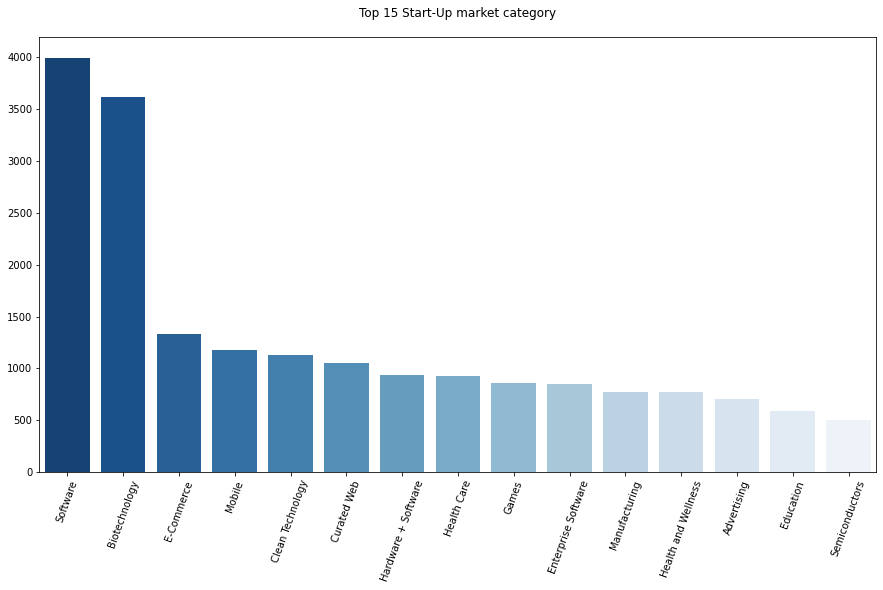

In [ ]:
plt.figure()
height = companies['category_list'].value_counts()[:15].tolist()
bars =  companies['category_list'].value_counts()[:15].index.tolist()
y_pos = np.arange(len(bars))
ax1=sns.barplot(y=height, x=bars, palette='Blues_r')
ax1.set_title('Top 15 Start-Up market category',pad=20)
plt.xticks(rotation=70)
plt.show()

In [ ]:
market=companies.category_list.value_counts()
market[(market>800)][0:10]
market=market[(market>800)][0:10].to_frame()

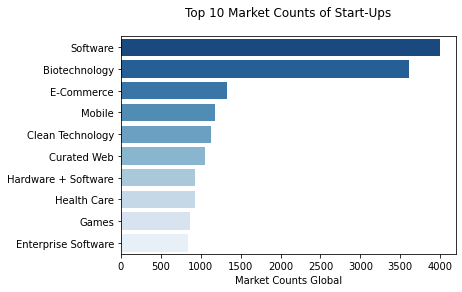

In [ ]:
import seaborn as sns

plt.figure()
ax1=sns.barplot(y=market.index,x=market.category_list,orient='h',palette='Blues_r')
ax1.set_title('Top 10 Market Counts of Start-Ups',pad=20)
ax1.set_xlabel('Market Counts Global')
plt.show()

###Total Funding USD

In [ ]:
companies['funding_total_usd'].head()

0    10000000
1      700000
2     3406878
3     2000000
4           -
Name: funding_total_usd, dtype: object

In [ ]:
companies['funding_total_usd'] = companies['funding_total_usd'].str.replace(',', '')
companies['funding_total_usd'] = companies['funding_total_usd'].str.replace('-', '')
companies['funding_total_usd'] = companies['funding_total_usd'].str.replace(' ', '')

companies['funding_total_usd'] = pd.to_numeric(companies['funding_total_usd'], errors='coerce')

In [ ]:
companies['funding_total_usd'].head()

0    10000000.0
1      700000.0
2     3406878.0
3     2000000.0
4           NaN
Name: funding_total_usd, dtype: float64

In [ ]:
Q1 = companies['funding_total_usd'].quantile(0.25)
Q3 = companies['funding_total_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = (Q1 - 1.5 * IQR)
upper_bound = (Q3 + 1.5 * IQR)

In [ ]:
without_outlier = companies[(companies['funding_total_usd'] > lower_bound ) & (companies['funding_total_usd'] < upper_bound)]

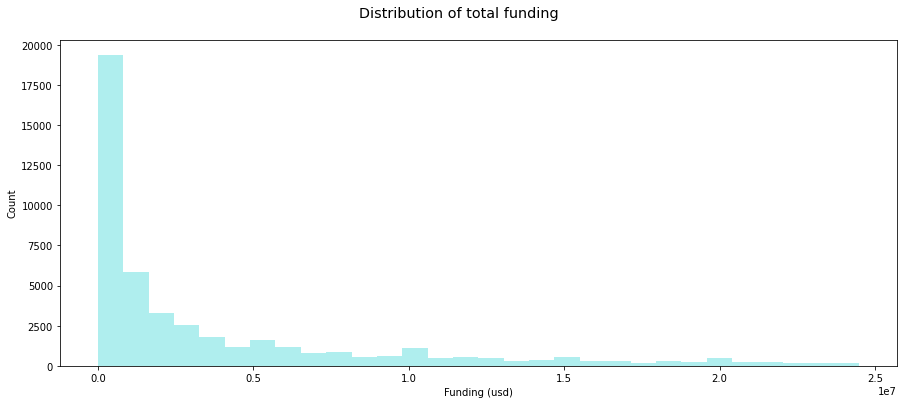

In [ ]:
plt.rcParams['figure.figsize'] = 15,6
plt.hist(without_outlier['funding_total_usd'].dropna(), bins=30,color = 'paleturquoise' )

plt.ylabel('Count')
plt.xlabel('Funding (usd)')
plt.title("Distribution of total funding ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

In [ ]:
Facebook_total_funding = companies['funding_total_usd'][companies['name']=="Facebook"].values[0]
Uber_total_funding = companies['funding_total_usd'][companies['name']=="Uber"].values[0]
Alibaba_total_funding = companies['funding_total_usd'][companies['name']=="Alibaba"].values[0]
Cloudera_total_funding = companies['funding_total_usd'][companies['name']=="Cloudera"].values[0]

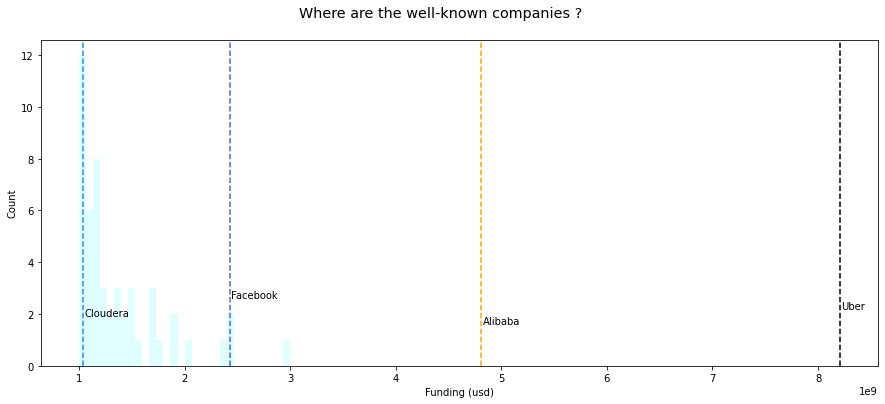

In [ ]:
plt.rcParams['figure.figsize'] = 15,6

plt.hist(companies['funding_total_usd'][(companies['funding_total_usd'] >= 1000000000)&(companies['funding_total_usd'] <= 3000000000)].dropna(), bins=30,color = 'lightcyan' )
plt.ylabel('Count')
plt.xlabel('Funding (usd)')
plt.title("Where are the well-known companies ? ", fontdict=None, position= [0.48,1.05], size = 'x-large')

plt.axvline(Facebook_total_funding,color='royalblue',linestyle ="--")
plt.text(Facebook_total_funding+15000000, 2.6,"Facebook")

plt.axvline(Uber_total_funding,color='black',linestyle ="--")
plt.text(Uber_total_funding+10000000, 2.2,"Uber")

plt.axvline(Cloudera_total_funding,color='dodgerblue',linestyle ="--")
plt.text(Cloudera_total_funding+10000000, 1.9,"Cloudera")

plt.axvline(Alibaba_total_funding,color='orange',linestyle ="--")
plt.text(Alibaba_total_funding+10000000, 1.6,"Alibaba")
#plt.ticklabel_format(style='plain')



plt.show()

In [ ]:
Verizon_total_funding = companies['funding_total_usd'][companies['name']=="Verizon Communications"].values[0]
Sberbank_total_funding = companies['funding_total_usd'][companies['name']=="Sberbank"].values[0]

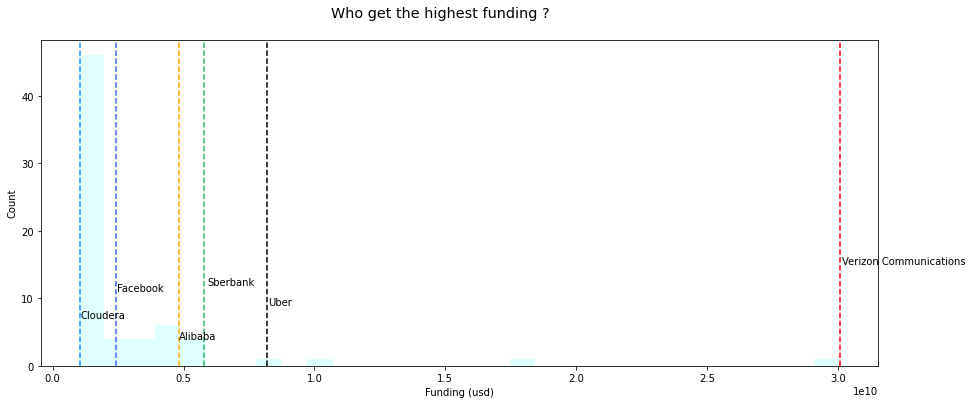

In [ ]:
plt.rcParams['figure.figsize'] = 15,6
plt.hist(companies['funding_total_usd'][(companies['funding_total_usd'] >= 1000000000)].dropna(), bins=30,color = 'lightcyan' )
plt.ylabel('Count')
plt.xlabel('Funding (usd)')
plt.title("Who get the highest funding ? ", fontdict=None, position= [0.48,1.05], size = 'x-large')

plt.axvline(Facebook_total_funding,color='royalblue',linestyle ="--")
plt.text(Facebook_total_funding+15000000, 11,"Facebook")

plt.axvline(Uber_total_funding,color='black',linestyle ="--")
plt.text(Uber_total_funding+10000000, 9,"Uber")

plt.axvline(Cloudera_total_funding,color='dodgerblue',linestyle ="--")
plt.text(Cloudera_total_funding+10000000, 7,"Cloudera")

plt.axvline(Alibaba_total_funding,color='orange',linestyle ="--")
plt.text(Alibaba_total_funding+10000000, 4,"Alibaba")

plt.axvline(Verizon_total_funding,color='red',linestyle ="--")
plt.text(Verizon_total_funding+100000000, 15,"Verizon Communications")

plt.axvline(Sberbank_total_funding,color='mediumseagreen',linestyle ="--")
plt.text(Sberbank_total_funding+100000000, 12,"Sberbank")


plt.show()

The most funding company in this dataset is "Verizon Communications" which has total fund around 30,000,000,000 usd

###Found at

In [ ]:
companies['founded_at'].head()

0           NaN
1    2014-09-04
2           NaN
3    2007-01-01
4    2010-01-01
Name: founded_at, dtype: object

In [ ]:
companies['founded_at'] = pd.to_datetime(companies['founded_at'], errors = 'coerce' )

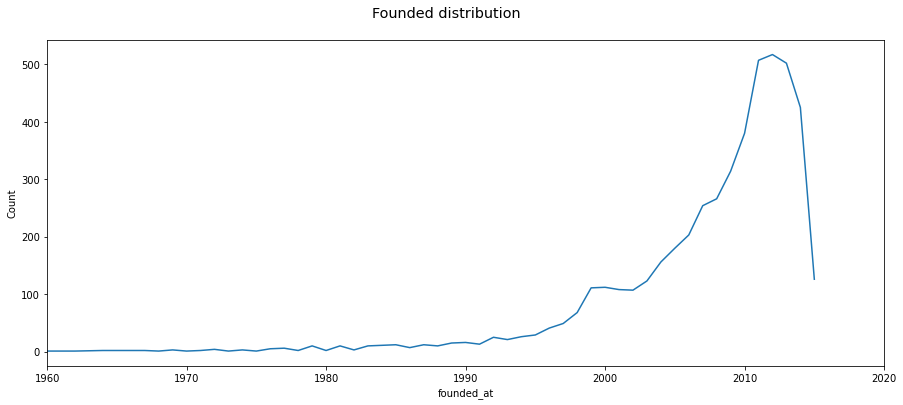

In [ ]:
plt.rcParams['figure.figsize'] = 15,6
companies['name'].groupby(companies["founded_at"].dt.year).count().plot(kind="line")

plt.ylabel('Count')
plt.title("Founded distribution ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.xlim(1960, 2020)
plt.show()

In [ ]:
Facebook_founded_year = companies['founded_at'][companies['name']=="Facebook"].dt.year.values[0]
Uber_founded_year  = companies['founded_at'][companies['name']=="Uber"].dt.year.values[0]
Alibaba_founded_year  = companies['founded_at'][companies['name']=="Alibaba"].dt.year.values[0]

In [ ]:
Uber_founded_year

2009

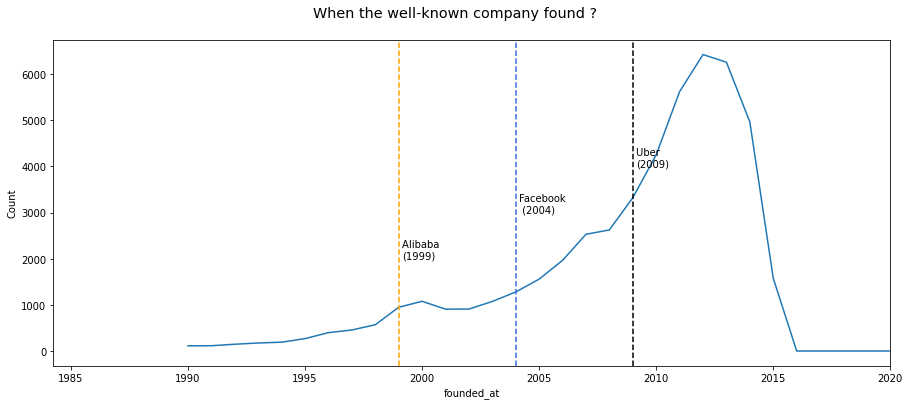

In [ ]:
plt.rcParams['figure.figsize'] = 15,6
companies['name'][companies["founded_at"].dt.year >= 1990].groupby(companies["founded_at"].dt.year).count().plot(kind="line")
plt.ylabel('Count')

plt.xlim(None, 2020)

plt.axvline(Facebook_founded_year,color='royalblue',linestyle ="--")
plt.text(Facebook_founded_year+0.15, 3000,"Facebook \n (2004)")

plt.axvline(Uber_founded_year,color='black',linestyle ="--")
plt.text(Uber_founded_year+0.15, 4000,"Uber \n(2009)")

plt.axvline(Alibaba_founded_year,color='orange',linestyle ="--")
plt.text(Alibaba_founded_year+0.15, 2000,"Alibaba \n(1999)")


plt.title("When the well-known company found ?", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

###Country Code

In [ ]:
len(companies['country_code'].unique())

138

In [ ]:
companies['country_code'].value_counts()[:8]

USA    37601
GBR     3688
CAN     1925
IND     1596
CHN     1544
FRA     1135
DEU     1082
ISR      965
Name: country_code, dtype: int64

Distribution of Startups among Countries

In [ ]:
fig_country = go.Figure()
fig_country.add_trace(go.Bar(x=companies['country_code'].value_counts().index[:20], y=companies['country_code'].value_counts()[:20],
                           hovertemplate = '<br><b>Country</b>: %{x}'+'<br><i>Startup count</i>: %{y}',
                           marker=dict(color=list(range(20)), colorscale="Sunsetdark")))

fig_country.update_layout(title="Number of Startups in each Country",
                             xaxis_title="Country", yaxis_title="Startup Count",title_x=0.5, paper_bgcolor="mintcream",
                             title_font_size=20)
fig_country.show()

Visualising distribution of startups among countries

In [ ]:
fig_country_map = go.Figure()
fig_country_map.add_trace(go.Choropleth(locations=companies['country_code'].value_counts().index,
                                       z=companies['country_code'].value_counts(),
                                       colorscale='Peach',
                                       colorbar_title="Nos. of Startups founded",
                                       ))
fig_country_map.update_layout(title_text="Number of Startups Country wise.", title_x=0.5, title_font_size=20, paper_bgcolor="mintcream")
fig_country_map.show()



Distribution of startups among various regions in the USA

In [ ]:
fig_USA_region = go.Figure()
fig_USA_region.add_trace(go.Bar(x=companies[companies.country_code == 'USA']['state_code'].value_counts().index[:20], y=companies[companies.country_code == 'USA']['state_code'].value_counts()[:20],
                            hovertemplate = '<br><b>Region</b>: %{x}'+'<br><i>Startup count</i>: %{y}',
                           marker=dict(color=list(range(20)), colorscale="Sunsetdark")))

fig_USA_region.update_layout(title="Number of Startups in each region in USA",
                             xaxis_title="Region", yaxis_title="Startup Count",title_x=0.5, paper_bgcolor="mintcream",
                             title_font_size=20)
fig_USA_region.show()

Visualising distribution of startups among different regions in the USA

In [ ]:
fig_USA_region_map = go.Figure()
fig_USA_region_map.add_trace(go.Choropleth(locations=companies[companies.country_code == 'USA']['state_code'].value_counts().index,
                                       z=companies[companies.country_code == 'USA']['state_code'].value_counts(),
                                       locationmode="USA-states",
                                       colorscale='Peach',
                                       colorbar_title="Nos. of Startups founded"))
fig_USA_region_map.update_layout(title_text="Number of Startups State wise in USA.", title_x=0.5, title_font_size=20,
                                        geo = dict(
                                        scope='usa',
                                        projection=go.layout.geo.Projection(type = 'albers usa'),
                                        showlakes=True, # lakes
                                        lakecolor='rgb(255, 255, 255)'),
                                        paper_bgcolor="mintcream")
fig_USA_region_map.show()

Country_code with Market

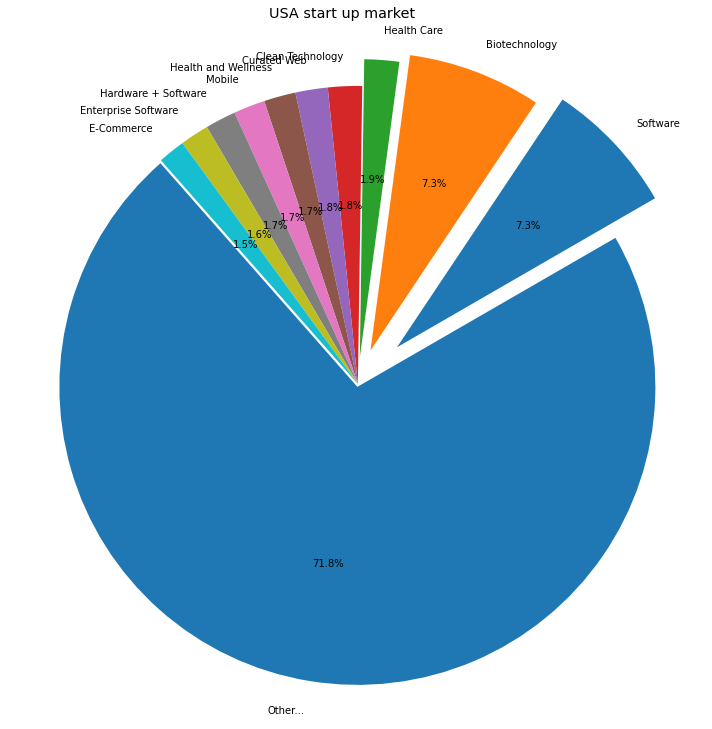

In [ ]:
companies['count'] = 1
country_market = companies[['count','country_code','category_list']].groupby(['country_code','category_list']).agg({'count': 'sum'})
# Change: groupby state_office and divide by sum
country_market_pct = country_market.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
country_market_pct.reset_index(inplace = True)

USA_market_pct = country_market_pct[country_market_pct['country_code'] == "USA"]
USA_market_pct = USA_market_pct.sort_values('count',ascending = False)[0:10]

## USA
plt.rcParams['figure.figsize'] =10,10
labels = list(USA_market_pct['category_list'])+['Other...']
sizes = list(USA_market_pct['count'])+[100-USA_market_pct['count'].sum()]
explode = (0.18, 0.12, 0.09,0,0,0,0,0,0,0,0.01)
colors =  ['royalblue','mediumaquamarine','moccasin'] +['oldlace']*8

plt.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=30)
plt.axis('equal')
plt.tight_layout()
plt.title("USA start up market", fontdict=None, position= [0.48,1.1], size = 'x-large')

plt.show()

In [ ]:
GRC_market_pct = country_market_pct[country_market_pct['country_code'] == "GRC"]
GRC_market_pct = GRC_market_pct.sort_values('count',ascending = False)[0:7]

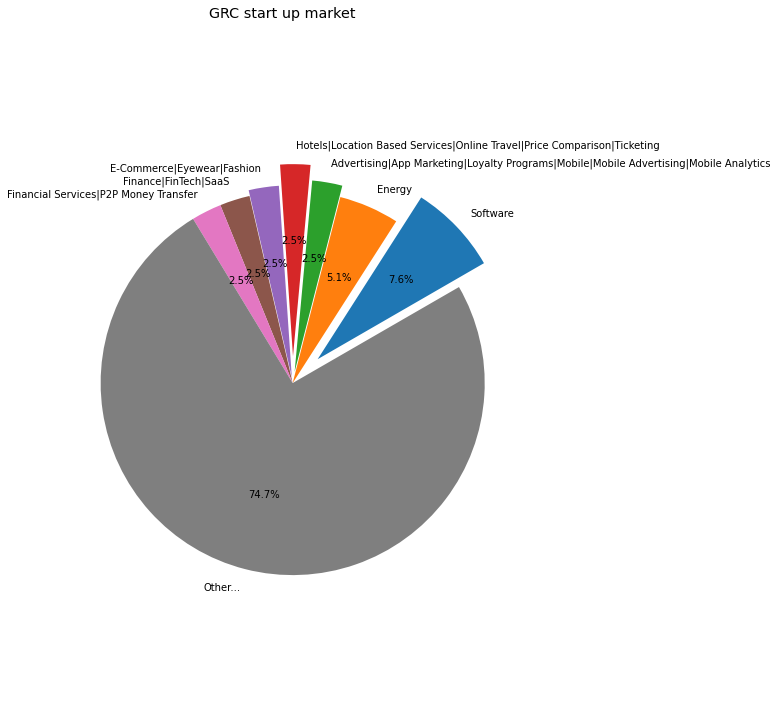

In [ ]:
plt.rcParams['figure.figsize'] = 10,10
labels = list(GRC_market_pct['category_list'])+['Other...']
sizes = list(GRC_market_pct['count'])+[100-USA_market_pct['count'].sum()]
explode = (0.18, 0, 0.06, 0.14, 0.03, 0, 0, 0)
colors =  ['royalblue','violet','gold'] +['oldlace']*8

plt.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=30)
plt.axis('equal')
plt.tight_layout()
plt.title("GRC start up market", fontdict=None, position= [0.48,1.1], size = 'x-large')
plt.show()

In [ ]:
funding_information(companies,rounds,"Uber")

Company :  Uber
Total Funding :  8207450000  $
Funding Rounds :  13
First Funding at:  2009-08-01
Last Funding at:  2015-09-07
Raised Amount : 0 $


In [ ]:
funding_information(companies,rounds,"Dropbox")

Company :  Dropbox
Total Funding :  1107215000  $
Funding Rounds :  6
First Funding at:  2007-06-01
Last Funding at:  2014-04-06
Raised Amount :  15000.0  $


###Funding Overview

In [ ]:
#in order to run it Rounds MUST be loaded
df = funding_information(companies,rounds,"Dropbox")

Company :  Dropbox
Total Funding :  1107215000  $
Seed Funding :  1215000.0  $
Angle Funding : 0.0  $
Debt Financing : 500000000.0  $
Private Equity : 0.0  $
Venture Funding : 606000000.0  $
Round A funding : 6000000.0  $
Round B funding : 250000000.0  $
Round C funding : 350000000.0  $
Round D funding : 0.0  $
Round E funding : 0.0  $
Round F funding : 0.0  $
Round G funding : 0.0  $
Round H funding : 0.0  $


In [ ]:
df["funded_at"] = pd.to_datetime(df["funded_at"])

df = df.sort_values(by="funded_at")
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29202,/organization/dropbox,Dropbox,Cloud Data Services|Storage|Web Hosting,USA,CA,SF Bay Area,San Francisco,/funding-round/06480ed05bdda6caeb0e365927f9c30b,seed,NaN,2007-06-01,15000.0
29204,/organization/dropbox,Dropbox,Cloud Data Services|Storage|Web Hosting,USA,CA,SF Bay Area,San Francisco,/funding-round/488cdf765daca41e2fc800347ccc5a43,seed,NaN,2007-09-04,1200000.0
29207,/organization/dropbox,Dropbox,Cloud Data Services|Storage|Web Hosting,USA,CA,SF Bay Area,San Francisco,/funding-round/f0060f848b90e98af4d26d84a6c98fb3,venture,A,2008-11-24,6000000.0
29206,/organization/dropbox,Dropbox,Cloud Data Services|Storage|Web Hosting,USA,CA,SF Bay Area,San Francisco,/funding-round/ec0043748057f7b18c1312fdcdd871be,venture,B,2011-10-18,250000000.0
29205,/organization/dropbox,Dropbox,Cloud Data Services|Storage|Web Hosting,USA,CA,SF Bay Area,San Francisco,/funding-round/c71ac91426570e91385d5961356e2f0d,venture,C,2014-01-24,350000000.0
29203,/organization/dropbox,Dropbox,Cloud Data Services|Storage|Web Hosting,USA,CA,SF Bay Area,San Francisco,/funding-round/224ac48ac0b1afa2dca33be4f9a3dbeb,debt_financing,NaN,2014-04-06,500000000.0


###Seed funding

Seed funding is the first official equity funding stage. 
It typically represents the first official money that a business venture or enterprise raises; 
some companies never extend beyond seed funding into Series A rounds or beyond.

Average funding in this stage

Note you need to beware when use the mean value
 Most of value in this column is 0, they will drag your average value down
 The solution is using data which is not 0 to find average

In [ ]:
#MUST throw zero seeds!!!!!
#keep only the seed rounds
x = rounds[rounds['funding_round_type'] == "seed"]
#mean with zeros is print(x.raised_amount_usd.mean())
#replace 0 with NaN in order not to count
x = x.replace(0, np.NaN)

print("The average of seed funding stage (without zeros) is around ", x.raised_amount_usd.mean(), "$")

The average of seed funding stage (without zeros) is around  722726.9091798536 $


But... How many company get funding in seed stage ?

all companies are  66103
companies which got seed  23508


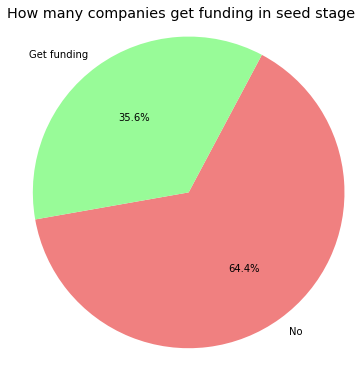

In [ ]:
#keep each company once only if it has seed round
x.drop_duplicates(subset=['company_name'])

#keep only the companies with seed round > 0
df = x[x['raised_amount_usd'].notna()]

y = companies.drop_duplicates(subset=['name'])
sumOfCompanies , _ = y.shape
print("all companies are ", sumOfCompanies)

companiesGotSeed, _ = df.shape
print("companies which got seed ", companiesGotSeed)


plt.rcParams['figure.figsize'] = 5,5
labels = ['No','Get funding']
sizes = [(sumOfCompanies - companiesGotSeed)/sumOfCompanies, companiesGotSeed/sumOfCompanies]
explode = (0, 0)
colors =  ['lightcoral','palegreen'] 

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=190)
plt.axis('equal')
plt.tight_layout()
plt.title("How many companies get funding in seed stage", fontdict=None, position= [0.48,1.1], size = 'x-large')

plt.show()

###Angel funding

Who is angel? 

An angel investor (also known as a private investor, seed investor or angel funder) is a high net worth individual who provides financial backing for small startups or entrepreneurs, typically in exchange for ownership equity in the company. Often, angel investors are found among
an entrepreneur's family and friends.
The funds that angel investors provide may be a one-time investment to help the business get off the ground 
or an ongoing injection to support and carry the company through its difficult early stages.

In [ ]:
x = rounds[rounds['funding_round_type'] == "angel"]
#mean with zeros is print(x.raised_amount_usd.mean())
#replace 0 with NaN in order not to count
x = x.replace(0, np.NaN)

print("The average of angel funding stage (without zeros) is around ", x.raised_amount_usd.mean(), "$")

The average of angel funding stage (without zeros) is around  964848.8554566163 $


all companies are  66103
companies which has angel  4829


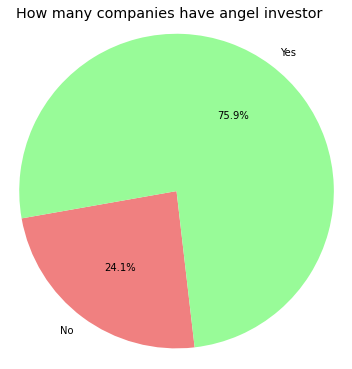

In [ ]:
#keep each company once only if it has angel round
x.drop_duplicates(subset=['company_name'])

#keep only the companies with angel round > 0
df = x[x['raised_amount_usd'].notna()]

print("all companies are ", sumOfCompanies)

companiesGotAngel, _ = df.shape
print("companies which has angel ", companiesGotAngel)


plt.rcParams['figure.figsize'] = 5,5
labels = ['No','Yes']
sizes = [(sumOfCompanies - companiesGotSeed)/sumOfCompanies, companiesGotSeed/sumOfCompanies]
explode = (0, 0)
colors =  ['lightcoral','palegreen'] 

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=190)
plt.axis('equal')
plt.tight_layout()
plt.title("How many companies have angel investor", fontdict=None, position= [0.48,1.1], size = 'x-large')

plt.show()

###Investment in each round

In [ ]:
x = rounds[rounds['funding_round_code'] == "A"]
#mean with zeros is print(x.raised_amount_usd.mean())
#replace 0 with NaN in order not to count
x = x.replace(0, np.NaN)

print("The average of A funding stage (without zeros) is around ", x.raised_amount_usd.mean(), "$")

The average of A funding stage (without zeros) is around  8173613.640583554 $


In [ ]:
amount = []
for r in ['A','B','C','D','E','F','G','H']:
  x = rounds[rounds['funding_round_code'] == r]
  x = x.replace(0, np.NaN)
  print("The average of {} funding stage (without zeros) is around ".format(r), x.raised_amount_usd.mean(), "$")
  amount.append(x.raised_amount_usd.mean())

The average of A funding stage (without zeros) is around  8173613.640583554 $
The average of B funding stage (without zeros) is around  14518096.114583334 $
The average of C funding stage (without zeros) is around  22178010.918518517 $
The average of D funding stage (without zeros) is around  28866574.75409836 $
The average of E funding stage (without zeros) is around  38190589.571428575 $
The average of F funding stage (without zeros) is around  55016743.84210526 $
The average of G funding stage (without zeros) is around  43900000.0 $
The average of H funding stage (without zeros) is around  nan $


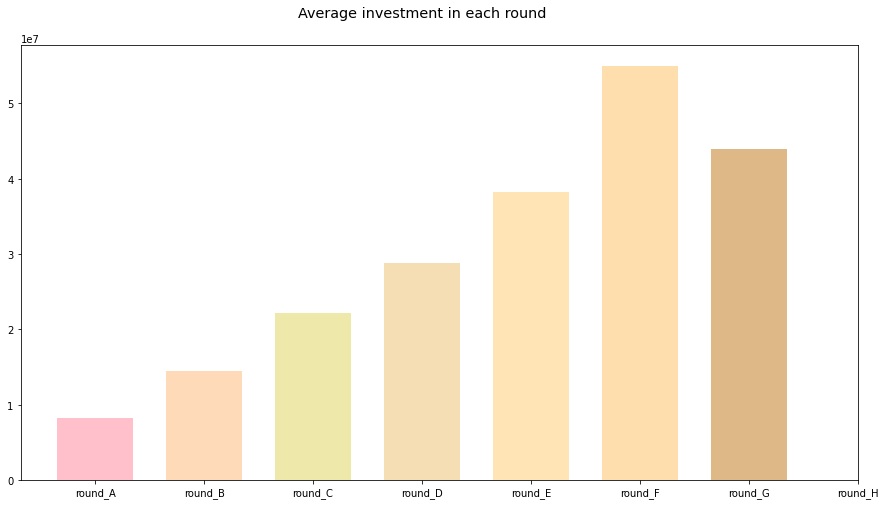

In [ ]:
round_ = ['round_A','round_B','round_C','round_D','round_E','round_F','round_G','round_H']

plt.rcParams['figure.figsize'] = 15,8

height = amount
bars =  round_
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7, color= ['Pink','PeachPuff','PaleGoldenRod','wheat','moccasin','navajowhite','burlywood','goldenrod'] )
plt.xticks(y_pos, bars)
plt.title("Average investment in each round", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

##Investments

In [ ]:
investments = pd.read_csv('investments.csv')
investments.dropna(axis=0, subset=['investor_permalink'], inplace=True)
investments.head()

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0
1,/organization/004-technologies,004 Technologies,Software,USA,IL,"Springfield, Illinois",Champaign,/organization/venturecapital-de,VCDE Venture Partners,DEU,5,Frankfurt,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,2014-07-24,NaN
2,/organization/01games-technology,01Games Technology,Games,HKG,NaN,Hong Kong,Hong Kong,/organization/cyberport-hong-kong,Cyberport Hong Kong,HKG,NaN,Hong Kong,Hong Kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,2014-07-01,41250.0
3,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/capital-one,Capital One,USA,VA,"Washington, D.C.",Mclean,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,20000000.0
4,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,2013-05-22,3000000.0


In [ ]:
print("shape =", investments.shape)
print("sum of NaN values =", investments.isnull().sum().sum())

shape = (168635, 18)
sum of NaN values = 312760


In [ ]:
print(investments['company_permalink'].isna().sum())
print(len(investments['company_permalink'].unique()))

0
44738


## Investors

create Investors

In [ ]:
investors = investments['investor_permalink'].unique()
investors = pd.DataFrame(investors, columns = ['investor_permalink'])
investors["invested_companies"] = 0
investors["average_investments"] = 0
investors["successes"] = 0
investors.head()

,investor_permalink,invested_companies,average_investments,successes
0,/organization/dt-capital-partners,0,0,0
1,/organization/venturecapital-de,0,0,0
2,/organization/cyberport-hong-kong,0,0,0
3,/organization/capital-one,0,0,0
4,/organization/nexus-venture-partners,0,0,0


In [ ]:
print("shape =", investors.shape)
print("sum of NaN values =", investors.isnull().sum().sum())

shape = (30732, 4)
sum of NaN values = 0


In [ ]:
for i in range(30732):
  investor_name = investors.iloc[i, 0]
  temp = investments[investments['investor_permalink']==investor_name]
  r = len(temp['company_permalink'].unique())
  investors.iloc[i, 1] = r
  investors.iloc[i, 2] = temp.shape[0]/r
investors.head()

,investor_permalink,invested_companies,average_investments,successes
0,/organization/dt-capital-partners,13,1.230769,0
1,/organization/venturecapital-de,5,1.600000,0
2,/organization/cyberport-hong-kong,162,1.030864,0
3,/organization/capital-one,8,1.250000,0
4,/organization/nexus-venture-partners,64,1.781250,0


In [ ]:
for i in range(30732):
  investor_name = investors.iloc[i, 0]
  df = investments[investments['investor_permalink']==investor_name]
  rows, _ = df.shape
  successful=0
  for j in range(rows):
    company_name = df.iloc[j, 0]
    temp = companies[companies['permalink']==company_name]
    if temp.shape[0] == 0:
      continue
    status = temp.iloc[0, 5]
    if status == 'acquired' or status == 'ipo':
      successful += 1
  investors.iloc[i, 3] = successful
investors.head()

,investor_permalink,invested_companies,average_investments,successes
0,/organization/dt-capital-partners,13,1.230769,2
1,/organization/venturecapital-de,5,1.600000,2
2,/organization/cyberport-hong-kong,162,1.030864,0
3,/organization/capital-one,8,1.250000,3
4,/organization/nexus-venture-partners,64,1.781250,7


In [ ]:
investors['successes'].value_counts()

0      23598
1       3879
2       1089
3        527
4        300
       ...  
70         1
181        1
117        1
69         1
103        1
Name: successes, Length: 110, dtype: int64

if investor's results are weird put its permalink below

In [ ]:
df = investments[investments['investor_permalink']=='/organization/cyberport-hong-kong']
rows, _ = df.shape
for j in range(rows):
  company_name = df.iloc[j, 0]
  temp = companies[companies['permalink']==company_name]
  if j == 0:
    k = temp
  else:
    k = k.append(temp)
k.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01
126,/organization/2-pro-media-group,2 Pro Media Group,http://www.2pro.hk,Digital Media|Marketing Automation|Media,41250,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-01-01,2014-01-01
263,/organization/3d-intelligent-pathological-medi...,3D Intelligent Pathological Medical Image Solu...,NaN,Alumni,12500,operating,NaN,NaN,NaN,NaN,1,NaN,2015-08-01,2015-08-01
444,/organization/5dpnp,5DPnP,NaN,3D|Digital Media|Graphics|Printing,12500,operating,NaN,NaN,NaN,NaN,1,NaN,2014-12-01,2014-12-01
676,/organization/abacuz-limited,Abacuz Limited,http://abacuz.com.hk,Digital Media|Sales and Marketing|Social Media,41250,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-01-01,2014-01-01


In [ ]:
k.shape

(167, 14)

In [ ]:
k['status'].value_counts()

operating    156
closed        11
Name: status, dtype: int64

In [ ]:
df.shape

(114, 18)

In [ ]:
from google.colab import files

investors.to_csv('investors.csv')
files.download('investors.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Rounds

In [ ]:
rounds = pd.read_csv('rounds.csv')
rounds.head()

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-01-05,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,DE,DE - Other,Delaware City,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,DE,DE - Other,Delaware City,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,2014-03-01,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0


In [ ]:
print("shape =", rounds.shape)
print("sum of NaN values =", rounds.isnull().sum().sum())

shape = (114949, 12)
sum of NaN values = 147165


###Funding Year

In [ ]:
rounds['funded_at'] = pd.to_datetime(rounds['funded_at'], errors = 'coerce' )

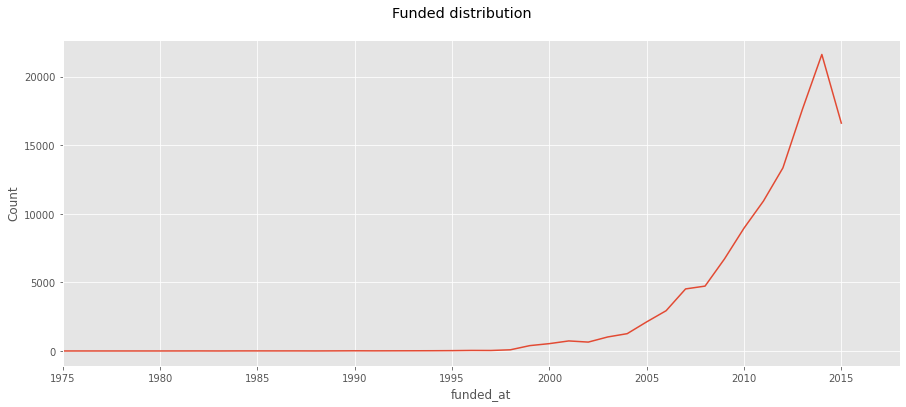

In [ ]:
plt.rcParams['figure.figsize'] = 15,6
rounds['company_name'].groupby(rounds["funded_at"].dt.year).count().plot(kind="line")

plt.ylabel('Count')
plt.title("Funded distribution ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.xlim(1975, 2018)
plt.show()

In [ ]:
import pandas as pd

df = pd.DataFrame({'x': ['a', 'b', 'c'], 'y': [1, 2, 3], 'z': ['d', 'e', 'f']})
print(df)
df = df.select_dtypes(exclude=['object'])
print(df)

   x  y  z
0  a  1  d
1  b  2  e
2  c  3  f
   y
0  1
1  2
2  3


### Round Type

In [ ]:
rounds['funding_round_type'].value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [ ]:
rounds['raised_amount_usd'].isna().sum()

20405

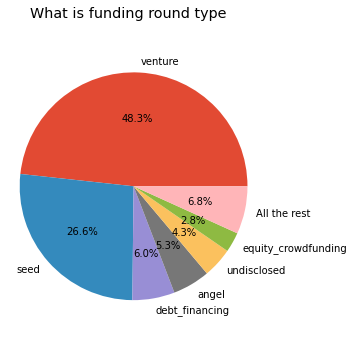

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

dic = {'venture': 55494,
       'seed': 30524,
       'debt_financing': 6895,
       'angel': 6094,
       'undisclosed': 4897,
       'equity_crowdfunding': 3257,
       'private_equity': 2285,
       'grant': 2200,
       'convertible_note': 1817,
       'post_ipo_equity': 638,
       'product_crowdfunding': 410,
       'non_equity_assistance': 191,
       'post_ipo_debt': 152,
       'secondary_market': 95
       }

# group together all elements in the dictionary whose value is less than 2
# name this group 'All the rest'
#import itertools
newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<3000) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.tight_layout()
plt.title("What is funding round type", fontdict=None, position= [0.48,1], size = 'x-large')

plt.show()

### Round Code

In [ ]:
rounds['funding_round_code'].isna().sum()

83809

In [ ]:
rounds['funding_round_code'].value_counts()

A    14747
B     8713
C     4476
D     2025
E      811
F      283
G       73
H       12
Name: funding_round_code, dtype: int64

# Update sklearn for Oversampling

must be up to 0.23 

In [ ]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 215kB 33.9MB/s 
     |████████████████████████████████| 22.3MB 37.2MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [ ]:
!pip uninstall sklearn -y
!pip install Cython
!pip install https://github.com/Santosh-Gupta/scikit-learn/archive/master.zip

import importlib
import sklearn.manifold
importlib.reload(sklearn.manifold)
from sklearn.manifold import TSNE

In [ ]:
!apt-get install swig -y
!pip install Cython numpy

!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (1,506 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpa

In [ ]:
import sklearn
print(sklearn.__version__)
#must be up to 0.23 

0.24.2


# Prepare Dataset

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [ ]:
data = pd.read_csv('companies.csv')
data.dropna(axis=0, subset=['status'], inplace=True)
data.funding_total_usd.replace(to_replace = '-', value = np.nan, inplace = True)
data["funding_total_usd"] = data.funding_total_usd.astype(float)
data = data.dropna(subset=['funding_total_usd'])
data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250.0,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01


In [ ]:
data.columns

Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at'],
      dtype='object')

In [ ]:
#for now I keep only 2 features
X = data.drop(['name', 'homepage_url', 'status', 'state_code', 'region',
       'city', 'founded_at', 'first_funding_at',
       'last_funding_at'], axis=1)
X.head()

,permalink,category_list,funding_total_usd,country_code,funding_rounds
0,/organization/-fame,Media,10000000.0,IND,1
1,/organization/-qounter,Application Platforms|Real Time|Social Network...,700000.0,USA,2
2,/organization/-the-one-of-them-inc-,Apps|Games|Mobile,3406878.0,NaN,1
3,/organization/0-6-com,Curated Web,2000000.0,CHN,1
5,/organization/01games-technology,Games,41250.0,HKG,1


In [ ]:
#for now I keep only 2 features
X = data.drop(['name', 'homepage_url', 
               'status', 'state_code', 'region',
       'city', 'founded_at', 'first_funding_at',
       'last_funding_at'], axis=1)
X.head()

,permalink,category_list,funding_total_usd,country_code,funding_rounds
0,/organization/-fame,Media,10000000.0,IND,1
1,/organization/-qounter,Application Platforms|Real Time|Social Network...,700000.0,USA,2
2,/organization/-the-one-of-them-inc-,Apps|Games|Mobile,3406878.0,NaN,1
3,/organization/0-6-com,Curated Web,2000000.0,CHN,1
5,/organization/01games-technology,Games,41250.0,HKG,1


In [ ]:
X[X["funding_total_usd"]==0.0]

,permalink,category_list,funding_total_usd,country_code,funding_rounds


In [ ]:
X.shape

(53583, 5)

prepare the **special_df**

In [ ]:
df.shape

(53583, 38)

In [ ]:
# df = special_df at the end
df = X.drop(['category_list', 'country_code'], axis=1)
df.head()

,permalink,funding_total_usd,funding_rounds
0,/organization/-fame,10000000.0,1
1,/organization/-qounter,700000.0,2
2,/organization/-the-one-of-them-inc-,3406878.0,1
3,/organization/0-6-com,2000000.0,1
5,/organization/01games-technology,41250.0,1


In [ ]:
df["USA"] = 0
df["GBR"] = 0
df["CAN"] = 0
df["IND"] = 0
df["CHN"] = 0
df["FRA"] = 0
df["DEU"] = 0
df["ISR"] = 0
df["ESP"] = 0
df["N_America"] = 0
df["S_America"] = 0
df["Europe"] = 0
df["Africa"] = 0
df["Asia"] = 0
df["Australia"] = 0
df["Unknown"] = 0

df["Software"] = 0
df["Biotechnology"] = 0
df["E-Commerce"] = 0
df["Mobile"] = 0
df["Clean Technology"] = 0
df["Curated Web"] = 0
df["Hardware + Software"] = 0
df["Health Care"] = 0
df["Games"] = 0
df["Enterprise Software"] = 0
df["Others"] = 0

df["A"] = 0
df["B"] = 0
df["C"] = 0
df["D"] = 0
df["E"] = 0
df["F"] = 0
df["G"] = 0
df["H"] = 0
df.head()

,permalink,funding_total_usd,funding_rounds,USA,GBR,CAN,IND,CHN,FRA,DEU,ISR,ESP,N_America,S_America,Europe,Africa,Asia,Australia,Unknown,Software,Biotechnology,E-Commerce,Mobile,Clean Technology,Curated Web,Hardware + Software,Health Care,Games,Enterprise Software,Others,A,B,C,D,E,F,G,H
0,/organization/-fame,10000000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,/organization/-qounter,700000.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,/organization/-the-one-of-them-inc-,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,/organization/0-6-com,2000000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,/organization/01games-technology,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = X
df["A"] = 0
df["B"] = 0
df["C"] = 0
df["D"] = 0
df["E"] = 0
df["F"] = 0
df["G"] = 0
df["H"] = 0
df.head()

,permalink,category_list,funding_total_usd,country_code,funding_rounds,A,B,C,D,E,F,G,H
0,/organization/-fame,Media,10000000.0,IND,1,0,0,0,0,0,0,0,0
1,/organization/-qounter,Application Platforms|Real Time|Social Network...,700000.0,USA,2,0,0,0,0,0,0,0,0
2,/organization/-the-one-of-them-inc-,Apps|Games|Mobile,3406878.0,NaN,1,0,0,0,0,0,0,0,0
3,/organization/0-6-com,Curated Web,2000000.0,CHN,1,0,0,0,0,0,0,0,0
5,/organization/01games-technology,Games,41250.0,HKG,1,0,0,0,0,0,0,0,0


In [ ]:
df.head()

,permalink,funding_total_usd,funding_rounds,A,B,C,D,E,F,G,H
0,/organization/-fame,10000000.0,1,0.0,10000000.0,0,0,0,0,0,0
1,/organization/-qounter,700000.0,2,NaN,0.0,0,0,0,0,0,0
2,/organization/-the-one-of-them-inc-,3406878.0,1,0.0,0.0,0,0,0,0,0,0
3,/organization/0-6-com,2000000.0,1,0.0,0.0,0,0,0,0,0,0
5,/organization/01games-technology,41250.0,1,0.0,0.0,0,0,0,0,0,0


fix rounds

In [ ]:
#load rounds
def isNaN(string):
    return string != string

for i, row in rounds.iterrows():
  name = row[0]
  index = df.index[df['permalink'] == name].values
  if not(isNaN(row['funding_round_code'])):
    df.loc[index, row['funding_round_code']] += row['raised_amount_usd']
df.head()

,permalink,funding_total_usd,funding_rounds,USA,GBR,CAN,IND,CHN,FRA,DEU,ISR,ESP,N_America,S_America,Europe,Africa,Asia,Australia,Unknown,Software,Biotechnology,E-Commerce,Mobile,Clean Technology,Curated Web,Hardware + Software,Health Care,Games,Enterprise Software,Others,A,B,C,D,E,F,G,H
0,/organization/-fame,10000000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/-qounter,700000.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/-the-one-of-them-inc-,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/0-6-com,2000000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,/organization/01games-technology,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


fix domain

In [ ]:
for i in range(53583):
  row = X.iloc[i,1]
  if isinstance(row, str):
    categories = row.split("|")
  else:
    categories = ['others']
  if i> 53580:
    print(i)
  #break
  for category in categories:
    if category == 'Software':
      df.iloc[i, 19] = 1
    elif category == 'Biotechnology':
      df.iloc[i, 20] = 1
    elif category == 'E-Commerce':
      df.iloc[i, 21] = 1
    elif category == 'Mobile':
      df.iloc[i, 22] = 1
    elif category == 'Clean Technology':
      df.iloc[i, 23] = 1
    elif category == 'Curated Web':
      df.iloc[i, 24] = 1
    elif category == 'Hardware + Software':
      df.iloc[i, 25] = 1
    elif category == 'Health Care':
      df.iloc[i, 26] = 1
    elif category == 'Games':
      df.iloc[i, 27] = 1
    elif category == 'Enterprise Software':
      df.iloc[i, 28] = 1
    else:
      df.iloc[i, 29] = 1
df.head()

53581
53582


,permalink,funding_total_usd,funding_rounds,USA,GBR,CAN,IND,CHN,FRA,DEU,ISR,ESP,N_America,S_America,Europe,Africa,Asia,Australia,Unknown,Software,Biotechnology,E-Commerce,Mobile,Clean Technology,Curated Web,Hardware + Software,Health Care,Games,Enterprise Software,Others,A,B,C,D,E,F,G,H
0,/organization/-fame,10000000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/-qounter,700000.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/-the-one-of-them-inc-,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/0-6-com,2000000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,/organization/01games-technology,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


fix country

In [ ]:
!pip install pycountry-convert

     |████████████████████████████████| 10.1MB 20.6MB/s 
     |████████████████████████████████| 245kB 52.4MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=8ed009ebe90c1f701f3bffb3670368027a8e370f9f8bf884aa54100c6bd6e312
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.5 which is incompatible.
ERROR: pytest-mock 3.6.1 has requirement pytest>=5.0, but you'll have pytest 3.6.4 which is incompatible.
ERROR: pytest-cov 2.12.0 has requirement pytest>=4.6, but you'll have pytest 3.6.4 which is incompatible.
  Found existing installation: coverage 3.7.

In [ ]:
from pycountry_convert import country_alpha2_to_continent_code, country_alpha3_to_country_alpha2
for i in range(53583):
  country_a3 = X.iloc[i, 3]
  if isinstance(country_a3, str):
    some_list = ['ROM', 'BAH','TAN']
    if any(country_a3 in s for s in some_list):
      continent = country_a3
    else:
      country_a2 = country_alpha3_to_country_alpha2(country_a3)
      continent = country_alpha2_to_continent_code(country_a2)
      if country_a3 == 'USA':
        df.iloc[i,3]= 1
      elif country_a3 == 'GBR':
        df.iloc[i,4]= 1
      elif country_a3 == 'CAN':
        df.iloc[i,5]= 1
      elif country_a3 == 'IND':
        df.iloc[i,6]= 1
      elif country_a3 == 'CHN':
        df.iloc[i,7]= 1
      elif country_a3 == 'FRA':
        df.iloc[i,8]= 1
      elif country_a3 == 'DEU':
        df.iloc[i,9]= 1
      elif country_a3 == 'ISR':
        df.iloc[i,10]= 1
      elif country_a3 == 'ESP':
        df.iloc[i,11]= 1
  else:
    continent = 'nan'
  if continent == 'AS' or continent == 'BAH':
    df.iloc[i,16]= 1
  elif continent == 'EU' or continent == 'ROM':
    df.iloc[i,14]= 1
  elif continent == 'NA':
    df.iloc[i,12]= 1
  elif continent == 'SA':
    df.iloc[i,13]= 1
  elif continent == 'OC':
    df.iloc[i,17]= 1
  elif continent == 'AF' or continent == 'TAN':
    df.iloc[i,15]= 1
  else:
    df.iloc[i,18]= 1
df.head()

,permalink,funding_total_usd,funding_rounds,USA,GBR,CAN,IND,CHN,FRA,DEU,ISR,ESP,N_America,S_America,Europe,Africa,Asia,Australia,Unknown,Software,Biotechnology,E-Commerce,Mobile,Clean Technology,Curated Web,Hardware + Software,Health Care,Games,Enterprise Software,Others,A,B,C,D,E,F,G,H
0,/organization/-fame,10000000.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/-qounter,700000.0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/-the-one-of-them-inc-,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/0-6-com,2000000.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,/organization/01games-technology,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df=df.fillna(0)
df.head()

,permalink,funding_total_usd,funding_rounds,USA,GBR,CAN,IND,CHN,FRA,DEU,ISR,ESP,N_America,S_America,Europe,Africa,Asia,Australia,Unknown,Software,Biotechnology,E-Commerce,Mobile,Clean Technology,Curated Web,Hardware + Software,Health Care,Games,Enterprise Software,Others,A,B,C,D,E,F,G,H
0,/organization/-fame,10000000.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/-qounter,700000.0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/-the-one-of-them-inc-,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/0-6-com,2000000.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,/organization/01games-technology,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = df.drop(['permalink'], axis=1)

In [ ]:
from google.colab import files

df.to_csv('special_df.csv')
files.download('special_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**ready**

In [ ]:
df = pd.read_csv('special_df.csv')
df = df.drop(df.columns[0], axis=1)
#df = df.drop(df.columns[0], axis=1)
df.head()

,funding_total_usd,funding_rounds,USA,GBR,CAN,IND,CHN,FRA,DEU,ISR,ESP,N_America,S_America,Europe,Africa,Asia,Australia,Unknown,Software,Biotechnology,E-Commerce,Mobile,Clean Technology,Curated Web,Hardware + Software,Health Care,Games,Enterprise Software,Others,A,B,C,D,E,F,G,H
0,10000000.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0
1,700000.0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000000.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(53583, 37)

In [ ]:
X.head()

,funding_total_usd,funding_rounds,A,B,C,D,E,F,G,H
0,10000000.0,1,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0
1,700000.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3406878.0,1,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000000.0,1,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,41250.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = pd.get_dummies(X, columns=['country_code'])
X.head()

,permalink,category_list,funding_total_usd,funding_rounds,country_code_ALB,country_code_ARE,country_code_ARG,country_code_ARM,country_code_AUS,country_code_AUT,country_code_AZE,country_code_BAH,country_code_BEL,country_code_BGD,country_code_BGR,country_code_BHR,country_code_BLM,country_code_BLR,country_code_BLZ,country_code_BMU,country_code_BRA,country_code_BRB,country_code_BWA,country_code_CAN,country_code_CHE,country_code_CHL,country_code_CHN,country_code_CIV,country_code_CMR,country_code_COL,country_code_CRI,country_code_CYM,country_code_CYP,country_code_CZE,country_code_DEU,country_code_DMA,country_code_DNK,country_code_DOM,country_code_DZA,country_code_ECU,...,country_code_PAK,country_code_PAN,country_code_PER,country_code_PHL,country_code_POL,country_code_PRI,country_code_PRT,country_code_PRY,country_code_PSE,country_code_QAT,country_code_ROM,country_code_RUS,country_code_RWA,country_code_SAU,country_code_SEN,country_code_SGP,country_code_SLV,country_code_SOM,country_code_SRB,country_code_SVK,country_code_SVN,country_code_SWE,country_code_SYC,country_code_TAN,country_code_TGO,country_code_THA,country_code_TTO,country_code_TUN,country_code_TUR,country_code_TWN,country_code_UGA,country_code_UKR,country_code_URY,country_code_USA,country_code_UZB,country_code_VEN,country_code_VNM,country_code_ZAF,country_code_ZMB,country_code_ZWE
0,/organization/-fame,Media,10000000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,/organization/-qounter,Application Platforms|Real Time|Social Network...,700000.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,/organization/-the-one-of-them-inc-,Apps|Games|Mobile,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,/organization/0-6-com,Curated Web,2000000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,/organization/01games-technology,Games,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df['category_list'].str.get_dummies(sep='|')

In [ ]:
X = pd.concat([X, df], axis=1)
X = X.drop(['category_list'], axis=1)
X.head()

,permalink,category_list,funding_total_usd,funding_rounds,country_code_ALB,country_code_ARE,country_code_ARG,country_code_ARM,country_code_AUS,country_code_AUT,country_code_AZE,country_code_BAH,country_code_BEL,country_code_BGD,country_code_BGR,country_code_BHR,country_code_BLM,country_code_BLR,country_code_BLZ,country_code_BMU,country_code_BRA,country_code_BRB,country_code_BWA,country_code_CAN,country_code_CHE,country_code_CHL,country_code_CHN,country_code_CIV,country_code_CMR,country_code_COL,country_code_CRI,country_code_CYM,country_code_CYP,country_code_CZE,country_code_DEU,country_code_DMA,country_code_DNK,country_code_DOM,country_code_DZA,country_code_ECU,...,Video on Demand,Virtual Currency,Virtual Desktop,Virtual Goods,Virtual Workforces,Virtual Worlds,Virtualization,Visual Search,Visualization,VoIP,Vulnerability Management,Waste Management,Watch,Water,Water Purification,Wealth Management,Wearables,Web Browsers,Web CMS,Web Design,Web Development,Web Hosting,Web Presence Management,Web Tools,WebOS,Weddings,West Africa,Wholesale,Wind,Windows Phone 7,Wine And Spirits,Wireless,Women,Writers,Young Adults,iOS,iPad,iPhone,iPod Touch,mHealth
0,/organization/-fame,Media,10000000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,/organization/-qounter,Application Platforms|Real Time|Social Network...,700000.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,/organization/-the-one-of-them-inc-,Apps|Games|Mobile,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,/organization/0-6-com,Curated Web,2000000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,/organization/01games-technology,Games,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Dataframe 10 attributes

In [ ]:
data = pd.read_csv('companies.csv')
data.dropna(axis=0, subset=['status'], inplace=True)
data.funding_total_usd.replace(to_replace = '-', value = np.nan, inplace = True)
data["funding_total_usd"] = data.funding_total_usd.astype(float)
data = data.dropna(subset=['funding_total_usd'])
data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250.0,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01


In [ ]:
X = data.drop(['name', 'homepage_url', 'status', 'state_code', 'region',
       'city', 'founded_at', 'first_funding_at',
       'last_funding_at'], axis=1)
X.head()

,permalink,category_list,funding_total_usd,country_code,funding_rounds
0,/organization/-fame,Media,10000000.0,IND,1
1,/organization/-qounter,Application Platforms|Real Time|Social Network...,700000.0,USA,2
2,/organization/-the-one-of-them-inc-,Apps|Games|Mobile,3406878.0,NaN,1
3,/organization/0-6-com,Curated Web,2000000.0,CHN,1
5,/organization/01games-technology,Games,41250.0,HKG,1


In [ ]:
df = X
df["A"] = 0
df["B"] = 0
df["C"] = 0
df["D"] = 0
df["E"] = 0
df["F"] = 0
df["G"] = 0
df["H"] = 0
df.head()

In [ ]:
#load rounds
def isNaN(string):
    return string != string

for i, row in rounds.iterrows():
  name = row[0]
  index = df.index[df['permalink'] == name].values
  if not(isNaN(row['funding_round_code'])):
    df.loc[index, row['funding_round_code']] += row['raised_amount_usd']
df.head()

In [ ]:
X = X.fillna(0.0)
X = X.drop(['permalink'], axis=1)
X.head()

In [ ]:
X = pd.get_dummies(X, columns=['country_code'])
X.head()

,category_list,funding_total_usd,funding_rounds,A,B,C,D,E,F,G,H,country_code_0.0,country_code_ALB,country_code_ARE,country_code_ARG,country_code_ARM,country_code_AUS,country_code_AUT,country_code_AZE,country_code_BAH,country_code_BEL,country_code_BGD,country_code_BGR,country_code_BHR,country_code_BLM,country_code_BLR,country_code_BLZ,country_code_BMU,country_code_BRA,country_code_BRB,country_code_BWA,country_code_CAN,country_code_CHE,country_code_CHL,country_code_CHN,country_code_CIV,country_code_CMR,country_code_COL,country_code_CRI,country_code_CYM,...,country_code_PAK,country_code_PAN,country_code_PER,country_code_PHL,country_code_POL,country_code_PRI,country_code_PRT,country_code_PRY,country_code_PSE,country_code_QAT,country_code_ROM,country_code_RUS,country_code_RWA,country_code_SAU,country_code_SEN,country_code_SGP,country_code_SLV,country_code_SOM,country_code_SRB,country_code_SVK,country_code_SVN,country_code_SWE,country_code_SYC,country_code_TAN,country_code_TGO,country_code_THA,country_code_TTO,country_code_TUN,country_code_TUR,country_code_TWN,country_code_UGA,country_code_UKR,country_code_URY,country_code_USA,country_code_UZB,country_code_VEN,country_code_VNM,country_code_ZAF,country_code_ZMB,country_code_ZWE
0,Media,10000000.0,1,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Application Platforms|Real Time|Social Network...,700000.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Apps|Games|Mobile,3406878.0,1,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Curated Web,2000000.0,1,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Games,41250.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = X['category_list'].str.get_dummies(sep='|')

In [ ]:
X = pd.concat([X, df], axis=1)
X = X.drop(['category_list'], axis=1)
X.head()

,funding_total_usd,funding_rounds,A,B,C,D,E,F,G,H,country_code_0.0,country_code_ALB,country_code_ARE,country_code_ARG,country_code_ARM,country_code_AUS,country_code_AUT,country_code_AZE,country_code_BAH,country_code_BEL,country_code_BGD,country_code_BGR,country_code_BHR,country_code_BLM,country_code_BLR,country_code_BLZ,country_code_BMU,country_code_BRA,country_code_BRB,country_code_BWA,country_code_CAN,country_code_CHE,country_code_CHL,country_code_CHN,country_code_CIV,country_code_CMR,country_code_COL,country_code_CRI,country_code_CYM,country_code_CYP,...,Video on Demand,Virtual Currency,Virtual Desktop,Virtual Goods,Virtual Workforces,Virtual Worlds,Virtualization,Visual Search,Visualization,VoIP,Vulnerability Management,Waste Management,Watch,Water,Water Purification,Wealth Management,Wearables,Web Browsers,Web CMS,Web Design,Web Development,Web Hosting,Web Presence Management,Web Tools,WebOS,Weddings,West Africa,Wholesale,Wind,Windows Phone 7,Wine And Spirits,Wireless,Women,Writers,Young Adults,iOS,iPad,iPhone,iPod Touch,mHealth
0,10000000.0,1,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,700000.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3406878.0,1,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2000000.0,1,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,41250.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from google.colab import files

X.to_csv('Datadrame.csv')
files.download('Datadrame.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Prepare Labels

In [ ]:
data = pd.read_csv('companies.csv')
data.dropna(axis=0, subset=['status'], inplace=True)
data.funding_total_usd.replace(to_replace = '-', value = np.nan, inplace = True)
data["funding_total_usd"] = data.funding_total_usd.astype(float)
data = data.dropna(subset=['funding_total_usd'])
data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250.0,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01


In [ ]:
data.columns

Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at'],
      dtype='object')

In [ ]:
#for now I keep only 2 features
X = data[['status']]
X.head()

,status
0,operating
1,operating
2,operating
3,operating
5,operating


In [ ]:
X['status'].value_counts()

operating    42440
closed        4912
acquired      4790
ipo           1441
Name: status, dtype: int64

In [ ]:
X.shape

(53583, 1)

In [ ]:
for i in range(53583):
  status = X.iloc[i,0]
  if status == 'acquired' or status == 'ipo':
    X.iloc[i,0] = 1
  else:
    X.iloc[i,0] = 0
X.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,status
0,0
1,0
2,0
3,0
5,0


In [ ]:
X['status'].value_counts()

0    47352
1     6231
Name: status, dtype: int64

# **Ποια άλλα χαρακτηριστικά να βάλω στο Χ**




Πρόσθεσα ως χαρακτηριστικά τα ποσά που πήρε κάθε εταιρία για κάθε γύρο χρηματοδότησης (από το αρχείο rounds)

In [ ]:
rounds = pd.read_csv('rounds.csv')
rounds.columns
rounds = rounds.drop(['company_name', 'company_category_list', 'company_country_code', 'company_state_code', 'company_region',
       'company_city', 'funding_round_permalink', 'funded_at'], axis=1)

In [ ]:
# delete the fundings which category (A to H) is not defined
rounds = rounds.dropna(subset=['funding_round_code'])
rounds = rounds.fillna(0)
rounds.head()

,company_permalink,funding_round_type,funding_round_code,raised_amount_usd
0,/organization/-fame,venture,B,10000000.0
1,/organization/-qounter,venture,A,0.0
3,/organization/-the-one-of-them-inc-,venture,B,3406878.0
4,/organization/0-6-com,venture,A,2000000.0
10,/organization/0xdata,venture,B,20000000.0


In [ ]:
rounds.funding_round_code.value_counts()

A    14747
B     8713
C     4476
D     2025
E      811
F      283
G       73
H       12
Name: funding_round_code, dtype: int64

In [ ]:
X["A"] = 0
X["B"] = 0
X["C"] = 0
X["D"] = 0
X["E"] = 0
X["F"] = 0
X["G"] = 0
X["H"] = 0
X.head()

,permalink,funding_total_usd,funding_rounds,country_code_ALB,country_code_ARE,country_code_ARG,country_code_ARM,country_code_AUS,country_code_AUT,country_code_AZE,country_code_BAH,country_code_BEL,country_code_BGD,country_code_BGR,country_code_BHR,country_code_BLM,country_code_BLR,country_code_BLZ,country_code_BMU,country_code_BRA,country_code_BRB,country_code_BWA,country_code_CAN,country_code_CHE,country_code_CHL,country_code_CHN,country_code_CIV,country_code_CMR,country_code_COL,country_code_CRI,country_code_CYM,country_code_CYP,country_code_CZE,country_code_DEU,country_code_DMA,country_code_DNK,country_code_DOM,country_code_DZA,country_code_ECU,country_code_EGY,...,Visualization,VoIP,Vulnerability Management,Waste Management,Watch,Water,Water Purification,Wealth Management,Wearables,Web Browsers,Web CMS,Web Design,Web Development,Web Hosting,Web Presence Management,Web Tools,WebOS,Weddings,West Africa,Wholesale,Wind,Windows Phone 7,Wine And Spirits,Wireless,Women,Writers,Young Adults,iOS,iPad,iPhone,iPod Touch,mHealth,A,B,C,D,E,F,G,H
0,/organization/-fame,10000000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,/organization/-qounter,700000.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,/organization/-the-one-of-them-inc-,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,/organization/0-6-com,2000000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,/organization/01games-technology,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.tail()

,permalink,funding_total_usd,funding_rounds,country_code_ALB,country_code_ARE,country_code_ARG,country_code_ARM,country_code_AUS,country_code_AUT,country_code_AZE,country_code_BAH,country_code_BEL,country_code_BGD,country_code_BGR,country_code_BHR,country_code_BLM,country_code_BLR,country_code_BLZ,country_code_BMU,country_code_BRA,country_code_BRB,country_code_BWA,country_code_CAN,country_code_CHE,country_code_CHL,country_code_CHN,country_code_CIV,country_code_CMR,country_code_COL,country_code_CRI,country_code_CYM,country_code_CYP,country_code_CZE,country_code_DEU,country_code_DMA,country_code_DNK,country_code_DOM,country_code_DZA,country_code_ECU,country_code_EGY,...,Visualization,VoIP,Vulnerability Management,Waste Management,Watch,Water,Water Purification,Wealth Management,Wearables,Web Browsers,Web CMS,Web Design,Web Development,Web Hosting,Web Presence Management,Web Tools,WebOS,Weddings,West Africa,Wholesale,Wind,Windows Phone 7,Wine And Spirits,Wireless,Women,Writers,Young Adults,iOS,iPad,iPhone,iPod Touch,mHealth,A,B,C,D,E,F,G,H
66362,/organization/zzish,1120000.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
66363,/organization/zznode-science-and-technology-co...,1587301.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
66364,/organization/zzzzapp-com,114304.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
66366,/organization/Ôasys-2,18192.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
66367,/organization/İnovatiff-reklam-ve-tanıtım-hizm...,14851.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i, row in rounds.iterrows():
  name = row[0]
  index = X.index[X['permalink'] == name].values
  X.loc[index, row['funding_round_code']] += row['raised_amount_usd']
X.head()

,permalink,funding_total_usd,funding_rounds,country_code_ALB,country_code_ARE,country_code_ARG,country_code_ARM,country_code_AUS,country_code_AUT,country_code_AZE,country_code_BAH,country_code_BEL,country_code_BGD,country_code_BGR,country_code_BHR,country_code_BLM,country_code_BLR,country_code_BLZ,country_code_BMU,country_code_BRA,country_code_BRB,country_code_BWA,country_code_CAN,country_code_CHE,country_code_CHL,country_code_CHN,country_code_CIV,country_code_CMR,country_code_COL,country_code_CRI,country_code_CYM,country_code_CYP,country_code_CZE,country_code_DEU,country_code_DMA,country_code_DNK,country_code_DOM,country_code_DZA,country_code_ECU,country_code_EGY,...,Visualization,VoIP,Vulnerability Management,Waste Management,Watch,Water,Water Purification,Wealth Management,Wearables,Web Browsers,Web CMS,Web Design,Web Development,Web Hosting,Web Presence Management,Web Tools,WebOS,Weddings,West Africa,Wholesale,Wind,Windows Phone 7,Wine And Spirits,Wireless,Women,Writers,Young Adults,iOS,iPad,iPhone,iPod Touch,mHealth,A,B,C,D,E,F,G,H
0,/organization/-fame,10000000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/-qounter,700000.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/-the-one-of-them-inc-,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/0-6-com,2000000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,/organization/01games-technology,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.tail()

,permalink,funding_total_usd,funding_rounds,country_code_ALB,country_code_ARE,country_code_ARG,country_code_ARM,country_code_AUS,country_code_AUT,country_code_AZE,country_code_BAH,country_code_BEL,country_code_BGD,country_code_BGR,country_code_BHR,country_code_BLM,country_code_BLR,country_code_BLZ,country_code_BMU,country_code_BRA,country_code_BRB,country_code_BWA,country_code_CAN,country_code_CHE,country_code_CHL,country_code_CHN,country_code_CIV,country_code_CMR,country_code_COL,country_code_CRI,country_code_CYM,country_code_CYP,country_code_CZE,country_code_DEU,country_code_DMA,country_code_DNK,country_code_DOM,country_code_DZA,country_code_ECU,country_code_EGY,...,Visualization,VoIP,Vulnerability Management,Waste Management,Watch,Water,Water Purification,Wealth Management,Wearables,Web Browsers,Web CMS,Web Design,Web Development,Web Hosting,Web Presence Management,Web Tools,WebOS,Weddings,West Africa,Wholesale,Wind,Windows Phone 7,Wine And Spirits,Wireless,Women,Writers,Young Adults,iOS,iPad,iPhone,iPod Touch,mHealth,A,B,C,D,E,F,G,H
66362,/organization/zzish,1120000.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66363,/organization/zznode-science-and-technology-co...,1587301.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66364,/organization/zzzzapp-com,114304.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66366,/organization/Ôasys-2,18192.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66367,/organization/İnovatiff-reklam-ve-tanıtım-hizm...,14851.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from google.colab import files

X.to_csv('dataframe.csv')
files.download('dataframe.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

X.to_csv('labels.csv')
files.download('labels.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Load data**

## Special Df

In [ ]:
X = pd.read_csv('special_df.csv')
X.shape

(53583, 39)

### Add round_type attribute

In [ ]:
df = X.drop(X.columns[0], axis=1)
df.head()

,permalink,funding_total_usd,funding_rounds,USA,GBR,CAN,IND,CHN,FRA,DEU,ISR,ESP,N_America,S_America,Europe,Africa,Asia,Australia,Unknown,Software,Biotechnology,E-Commerce,Mobile,Clean Technology,Curated Web,Hardware + Software,Health Care,Games,Enterprise Software,Others,A,B,C,D,E,F,G,H
0,/organization/-fame,10000000.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/-qounter,700000.0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/-the-one-of-them-inc-,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/0-6-com,2000000.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/01games-technology,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df["venture"] = 0
df["seed"] = 0
df["debt_financing"] = 0
df["angel"] = 0
df["undisclosed"] = 0
df["equity_crowdfunding"] = 0
df["private_equity"] = 0
df["grant"] = 0
df["convertible_note"] = 0
df["post_ipo_equity"] = 0
df["product_crowdfunding"] = 0
df["non_equity_assistance"] = 0
df["post_ipo_debt"] = 0
df["secondary_market"] = 0

In [ ]:
#load rounds
lista = ['venture','seed','debt_financing','angel','undisclosed','equity_crowdfunding','private_equity','grant','convertible_note','post_ipo_equity','product_crowdfunding','non_equity_assistance','post_ipo_debt','secondary_market']
sum=0
for i, row in rounds.iterrows():
  name = row[0]
  round_type = row[8]
  index = df.index[df['permalink'] == name].values
  if round_type in lista:
    df.loc[index, row['funding_round_type']] += 1
  else:
    sum+=1

print(sum)
df.head()

0


,permalink,funding_total_usd,funding_rounds,USA,GBR,CAN,IND,CHN,FRA,DEU,ISR,ESP,N_America,S_America,Europe,Africa,Asia,Australia,Unknown,Software,Biotechnology,E-Commerce,Mobile,Clean Technology,Curated Web,Hardware + Software,Health Care,Games,Enterprise Software,Others,A,B,C,D,E,F,G,H,venture,seed,debt_financing,angel,undisclosed,equity_crowdfunding,private_equity,grant,convertible_note,post_ipo_equity,product_crowdfunding,non_equity_assistance,post_ipo_debt,secondary_market
0,/organization/-fame,10000000.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,/organization/-qounter,700000.0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,/organization/-the-one-of-them-inc-,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,/organization/0-6-com,2000000.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,/organization/01games-technology,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
from google.colab import files

X.to_csv('special_df_feature51.csv')
files.download('special_df_feature51.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Load

In [ ]:
X = X.drop(X.columns[0], axis=1)
X = X.drop(X.columns[0], axis=1)
X.head()

,funding_total_usd,funding_rounds,USA,GBR,CAN,IND,CHN,FRA,DEU,ISR,ESP,N_America,S_America,Europe,Africa,Asia,Australia,Unknown,Software,Biotechnology,E-Commerce,Mobile,Clean Technology,Curated Web,Hardware + Software,Health Care,Games,Enterprise Software,Others,A,B,C,D,E,F,G,H
0,10000000.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0
1,700000.0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000000.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Special Df 2 (43 features)

In [ ]:
X = pd.read_csv('special_df2.csv')
X = X.drop(X.columns[0], axis=1)
X = X.drop(X.columns[0], axis=1)
X.shape

(53583, 43)

In [ ]:
X.head()

,funding_total_usd,funding_rounds,USA,GBR,CAN,IND,CHN,FRA,DEU,ISR,ESP,N_America,S_America,Europe,Africa,Asia,Australia,Unknown,Software,Biotechnology,E-Commerce,Mobile,Clean Technology,Curated Web,Hardware + Software,Health Care,Games,Enterprise Software,Others,A,B,C,D,E,F,G,H,venture,seed,debt_financing,angel,undisclosed,equity_crowdfunding
0,10000000.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0
1,700000.0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0
2,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0
3,2000000.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0
4,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0


In [ ]:
X = df
X = X.drop(X.columns[0], axis=1)

#X["status"] = y

In [ ]:
X = X.drop(X.columns[51], axis=1)
X.head()

,funding_total_usd,funding_rounds,USA,GBR,CAN,IND,CHN,FRA,DEU,ISR,ESP,N_America,S_America,Europe,Africa,Asia,Australia,Unknown,Software,Biotechnology,E-Commerce,Mobile,Clean Technology,Curated Web,Hardware + Software,Health Care,Games,Enterprise Software,Others,A,B,C,D,E,F,G,H,venture,seed,debt_financing,angel,undisclosed,equity_crowdfunding,private_equity,grant,convertible_note,post_ipo_equity,product_crowdfunding,non_equity_assistance,post_ipo_debt,secondary_market
0,10000000.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,700000.0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2000000.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
X.shape

(53583, 51)

In [ ]:
private_equity 	grant 	convertible_note 	post_ipo_equity 	product_crowdfunding 	non_equity_assistance 	post_ipo_debt 	secondary_market

In [ ]:
X['secondary_market'].value_counts()

0    53507
1       67
2        8
4        1
Name: secondary_market, dtype: int64

In [ ]:
dok = X.loc[X['secondary_market'] == 4]
dok['status'].value_counts()

0    1
Name: status, dtype: int64

In [ ]:
X.shape

(53583, 44)

### venture

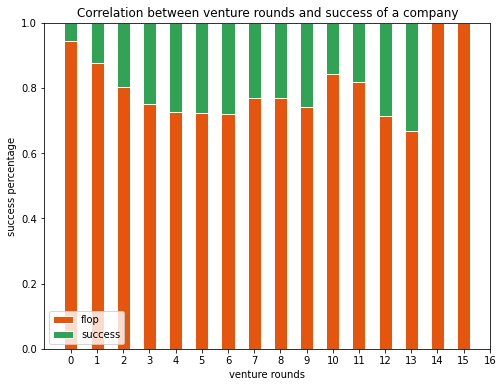

In [ ]:
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
plt.figure(figsize=(8,6))
status_cont=X.groupby('venture')['status'].value_counts(normalize=True)
cont=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
status_cont=status_cont.loc[cont].unstack().T
plt.bar(status_cont.columns,status_cont.loc[0],color=outer_colors[1],label='flop',width=0.5,edgecolor='w')
plt.bar(status_cont.columns,status_cont.loc[1],bottom=status_cont.loc[0],color=outer_colors[2],label='success',width=0.5,edgecolor='w')
plt.legend()
plt.title('Correlation between venture rounds and success of a company')
plt.xlabel('venture rounds')
plt.ylabel('success percentage')
bars = ('0','1', '2', '3', '4', '5', '6','7','8','9','10','11','12','13','14','15','16')
x_pos = np.arange(len(bars))
plt.xticks(x_pos, bars)
plt.show()

### seed

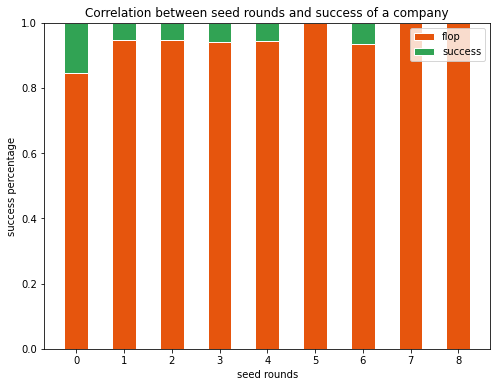

In [ ]:
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
plt.figure(figsize=(8,6))
status_cont=X.groupby('seed')['status'].value_counts(normalize=True)
cont=[0,1,2,3,4,5,6,7,8]
status_cont=status_cont.loc[cont].unstack().T
plt.bar(status_cont.columns,status_cont.loc[0],color=outer_colors[1],label='flop',width=0.5,edgecolor='w')
plt.bar(status_cont.columns,status_cont.loc[1],bottom=status_cont.loc[0],color=outer_colors[2],label='success',width=0.5,edgecolor='w')
plt.legend()
plt.title('Correlation between seed rounds and success of a company')
plt.xlabel('seed rounds')
plt.ylabel('success percentage')
bars = ('0','1', '2', '3', '4', '5', '6','7','8')
x_pos = np.arange(len(bars))
plt.xticks(x_pos, bars)
plt.show()

### debt_financing

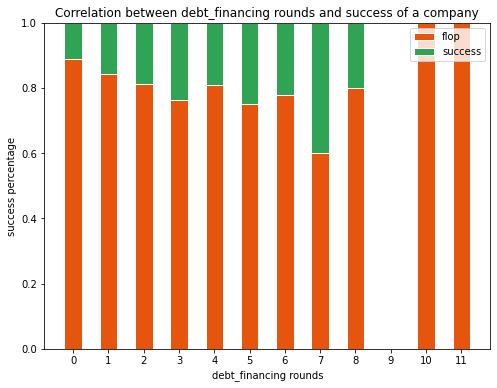

In [ ]:
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
plt.figure(figsize=(8,6))
status_cont=X.groupby('debt_financing')['status'].value_counts(normalize=True)
cont=[0,1,2,3,4,5,6,7,8,10,11]
status_cont=status_cont.loc[cont].unstack().T
plt.bar(status_cont.columns,status_cont.loc[0],color=outer_colors[1],label='flop',width=0.5,edgecolor='w')
plt.bar(status_cont.columns,status_cont.loc[1],bottom=status_cont.loc[0],color=outer_colors[2],label='success',width=0.5,edgecolor='w')
plt.legend()
plt.title('Correlation between debt_financing rounds and success of a company')
plt.xlabel('debt_financing rounds')
plt.ylabel('success percentage')
bars = ('0','1', '2', '3', '4', '5', '6','7','8','9','10','11')
x_pos = np.arange(len(bars))
plt.xticks(x_pos, bars)
plt.show()

### angel

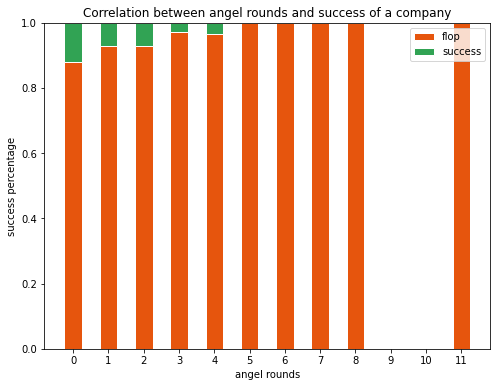

In [ ]:
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
plt.figure(figsize=(8,6))
status_cont=X.groupby('angel')['status'].value_counts(normalize=True)
cont=[0,1,2,3,4,5,6,7,8,11]
status_cont=status_cont.loc[cont].unstack().T
plt.bar(status_cont.columns,status_cont.loc[0],color=outer_colors[1],label='flop',width=0.5,edgecolor='w')
plt.bar(status_cont.columns,status_cont.loc[1],bottom=status_cont.loc[0],color=outer_colors[2],label='success',width=0.5,edgecolor='w')
plt.legend()
plt.title('Correlation between angel rounds and success of a company')
plt.xlabel('angel rounds')
plt.ylabel('success percentage')
bars = ('0','1', '2', '3', '4', '5', '6','7','8','9','10','11')
x_pos = np.arange(len(bars))
plt.xticks(x_pos, bars)
plt.show()

### undisclosed

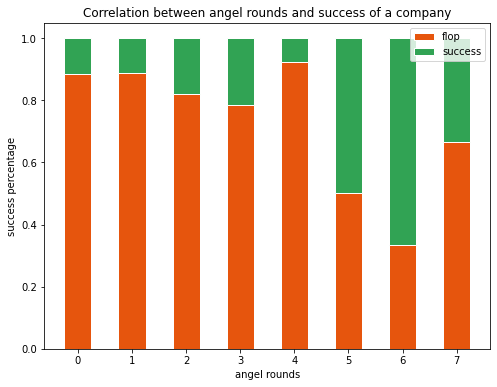

In [ ]:
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
plt.figure(figsize=(8,6))
status_cont=X.groupby('undisclosed')['status'].value_counts(normalize=True)
cont=[0,1,2,3,4,5,6,7]
status_cont=status_cont.loc[cont].unstack().T
plt.bar(status_cont.columns,status_cont.loc[0],color=outer_colors[1],label='flop',width=0.5,edgecolor='w')
plt.bar(status_cont.columns,status_cont.loc[1],bottom=status_cont.loc[0],color=outer_colors[2],label='success',width=0.5,edgecolor='w')
plt.legend()
plt.title('Correlation between angel rounds and success of a company')
plt.xlabel('angel rounds')
plt.ylabel('success percentage')
bars = ('0','1', '2', '3', '4', '5', '6','7')
x_pos = np.arange(len(bars))
plt.xticks(x_pos, bars)
plt.show()

### equity_crowdfunding

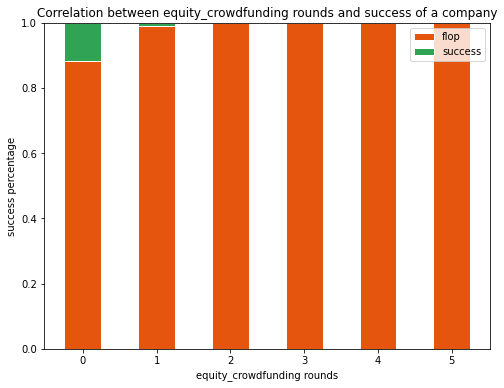

In [ ]:
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
plt.figure(figsize=(8,6))
status_cont=X.groupby('equity_crowdfunding')['status'].value_counts(normalize=True)
cont=[0,1,2,3,4,5]
status_cont=status_cont.loc[cont].unstack().T
plt.bar(status_cont.columns,status_cont.loc[0],color=outer_colors[1],label='flop',width=0.5,edgecolor='w')
plt.bar(status_cont.columns,status_cont.loc[1],bottom=status_cont.loc[0],color=outer_colors[2],label='success',width=0.5,edgecolor='w')
plt.legend()
plt.title('Correlation between equity_crowdfunding rounds and success of a company')
plt.xlabel('equity_crowdfunding rounds')
plt.ylabel('success percentage')
bars = ('0','1', '2', '3', '4', '5')
x_pos = np.arange(len(bars))
plt.xticks(x_pos, bars)
plt.show()

## Df51

In [ ]:
X = pd.read_csv('special_df_feature51.csv')
X = X.drop(X.columns[0], axis=1)
#X['company_name'] = 0
X.shape

(53583, 52)

In [ ]:
name = companies['permalink']
name.head()

0                    /organization/-fame
1                 /organization/-qounter
2    /organization/-the-one-of-them-inc-
3                  /organization/0-6-com
5       /organization/01games-technology
Name: permalink, dtype: object

In [ ]:
for i in range(53583):
  nam = name.iloc[i]
  X.iloc[i,54] = nam
X.head()

,funding_total_usd,funding_rounds,USA,GBR,CAN,IND,CHN,FRA,DEU,ISR,ESP,N_America,S_America,Europe,Africa,Asia,Australia,Unknown,Software,Biotechnology,E-Commerce,Mobile,Clean Technology,Curated Web,Hardware + Software,Health Care,Games,Enterprise Software,Others,A,B,C,D,E,F,G,H,venture,seed,debt_financing,angel,undisclosed,equity_crowdfunding,private_equity,grant,convertible_note,post_ipo_equity,product_crowdfunding,non_equity_assistance,post_ipo_debt,secondary_market,investors,successes,experience,company_name
0,10000000.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/organization/-fame
1,700000.0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/organization/-qounter
2,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/organization/-the-one-of-them-inc-
3,2000000.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,13,/organization/0-6-com
4,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,162,/organization/01games-technology


### Add investors

In [ ]:
X["investors"] = 0
X["successes"] = 0
X["experience"] = 0

In [ ]:
for i in range(53583):
  nam = X.iloc[i,51]
  temp = investments[investments['company_permalink']==nam] #investors that have invested in the company
  temp = temp.drop_duplicates(subset=['investor_permalink']) #keep each investor once
  r = len(temp)
  if r==0:
    continue
  X.iloc[i, 52] = r #number of investors
  sucesses = 0
  experience = 0
  for j in range(r):
    t = temp.iloc[j] #investor j
    investor = investors[investors["investor_permalink"]==t['investor_permalink']]
    X.iloc[i,54] += investor.iloc[0,1] #experience
    X.iloc[i,53] += investor.iloc[0,3] #successes
X.head()

,funding_total_usd,funding_rounds,USA,GBR,CAN,IND,CHN,FRA,DEU,ISR,ESP,N_America,S_America,Europe,Africa,Asia,Australia,Unknown,Software,Biotechnology,E-Commerce,Mobile,Clean Technology,Curated Web,Hardware + Software,Health Care,Games,Enterprise Software,Others,A,B,C,D,E,F,G,H,venture,seed,debt_financing,angel,undisclosed,equity_crowdfunding,private_equity,grant,convertible_note,post_ipo_equity,product_crowdfunding,non_equity_assistance,post_ipo_debt,secondary_market,company_name,investors,successes,experience
0,10000000.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,/organization/-fame,0,0,0
1,700000.0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,/organization/-qounter,0,0,0
2,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,/organization/-the-one-of-them-inc-,0,0,0
3,2000000.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,/organization/0-6-com,1,2,13
4,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,/organization/01games-technology,1,0,162


In [ ]:
sum=0
for i in range(53583):
  if X.iloc[i,52] == 0:
    sum+=1
print(sum)

17383


In [ ]:
X = X.drop(X.columns[51], axis=1)
X.head()

,funding_total_usd,funding_rounds,USA,GBR,CAN,IND,CHN,FRA,DEU,ISR,ESP,N_America,S_America,Europe,Africa,Asia,Australia,Unknown,Software,Biotechnology,E-Commerce,Mobile,Clean Technology,Curated Web,Hardware + Software,Health Care,Games,Enterprise Software,Others,A,B,C,D,E,F,G,H,venture,seed,debt_financing,angel,undisclosed,equity_crowdfunding,private_equity,grant,convertible_note,post_ipo_equity,product_crowdfunding,non_equity_assistance,post_ipo_debt,secondary_market,investors,successes,experience
0,10000000.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,700000.0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2000000.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,13
4,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,162


In [ ]:
from google.colab import files

X.to_csv('df51investors.csv')
files.download('df51investors.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X = pd.read_csv('df51investors.csv')
X = X.drop(X.columns[0], axis=1)
X.shape

(53583, 54)

In [ ]:
X.iloc[3,51]

'/organization/0-6-com'

In [ ]:
temp = investments[investments['company_permalink']=='/organization/0-6-com']
r = len(temp)
temp.head()

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0


In [ ]:
t = temp.iloc[0]
t.head()

company_permalink        /organization/0-6-com
company_name                           0-6.com
company_category_list              Curated Web
company_country_code                       CHN
company_state_code                          22
Name: 0, dtype: object

In [ ]:
investor = investors[investors["investor_permalink"]==t['investor_permalink']]
investor.head()

,investor_permalink,invested_companies,average_investments,successes
0,/organization/dt-capital-partners,13,1.230769,2


In [ ]:
investor.iloc[0,3]

2

### Add acquirers

In [ ]:
X = pd.read_csv('df51investors.csv')
X = X.drop(X.columns[0], axis=1)
X['company_name'] = 0
X.shape

(53583, 55)

In [ ]:
X.head()

,funding_total_usd,funding_rounds,USA,GBR,CAN,IND,CHN,FRA,DEU,ISR,ESP,N_America,S_America,Europe,Africa,Asia,Australia,Unknown,Software,Biotechnology,E-Commerce,Mobile,Clean Technology,Curated Web,Hardware + Software,Health Care,Games,Enterprise Software,Others,A,B,C,D,E,F,G,H,venture,seed,debt_financing,angel,undisclosed,equity_crowdfunding,private_equity,grant,convertible_note,post_ipo_equity,product_crowdfunding,non_equity_assistance,post_ipo_debt,secondary_market,investors,successes,experience,company_name
0,10000000.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,700000.0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2000000.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,13,0
4,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,162,0


In [ ]:
X["acquirers"] = 0
X["acquirers_successes"] = 0
X["acquirers_experience"] = 0

In [ ]:
for i in range(9489):
  nam = X.iloc[i,54]
  temp = acquisitions[acquisitions['company_permalink']==nam] #acquirers that have acquirered the company
  temp = temp.drop_duplicates(subset=['acquirer_permalink']) #keep each acquirer once
  r = len(temp)
  if r==0:
    continue
  X.iloc[i, 55] = r #number of acquirers
  sucesses = 0
  experience = 0
  for j in range(r):
    t = temp.iloc[j] #acquirer j
    acquirer = acquirers[acquirers["acquirer_permalink"]==t['acquirer_permalink']]
    X.iloc[i,57] += acquirer.iloc[0,1] #experience
    X.iloc[i,56] += acquirer.iloc[0,3] #successes
X.head()

,funding_total_usd,funding_rounds,USA,GBR,CAN,IND,CHN,FRA,DEU,ISR,ESP,N_America,S_America,Europe,Africa,Asia,Australia,Unknown,Software,Biotechnology,E-Commerce,Mobile,Clean Technology,Curated Web,Hardware + Software,Health Care,Games,Enterprise Software,Others,A,B,C,D,E,F,G,H,venture,seed,debt_financing,angel,undisclosed,equity_crowdfunding,private_equity,grant,convertible_note,post_ipo_equity,product_crowdfunding,non_equity_assistance,post_ipo_debt,secondary_market,investors,successes,experience,company_name,acquirers,acquirers_successes,acquirers_experience
0,10000000.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/organization/-fame,0,0,0
1,700000.0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/organization/-qounter,0,0,0
2,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/organization/-the-one-of-them-inc-,0,0,0
3,2000000.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,13,/organization/0-6-com,0,0,0
4,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,162,/organization/01games-technology,0,0,0


In [ ]:
X['acquirers_experience'].value_counts()

0      52687
1        259
2        106
3         80
4         65
5         39
6         38
8         34
7         20
9         20
11        19
12        17
15        16
175       15
22        12
91        12
190       12
156       11
65        11
118       11
137        9
10         9
21         8
16         7
17         5
23         5
46         4
13         4
27         4
53         4
24         3
69         3
43         3
34         3
33         3
66         3
55         2
25         2
38         2
18         2
19         2
51         2
28         2
30         2
31         1
68         1
139        1
20         1
29         1
14         1
Name: acquirers_experience, dtype: int64

In [ ]:
sum=0
for i in range(53583):
  if X.iloc[i,52] == 0:
    sum+=1
print(sum)

17383


In [ ]:
X = X.drop(X.columns[54], axis=1)
X.head()

,funding_total_usd,funding_rounds,USA,GBR,CAN,IND,CHN,FRA,DEU,ISR,ESP,N_America,S_America,Europe,Africa,Asia,Australia,Unknown,Software,Biotechnology,E-Commerce,Mobile,Clean Technology,Curated Web,Hardware + Software,Health Care,Games,Enterprise Software,Others,A,B,C,D,E,F,G,H,venture,seed,debt_financing,angel,undisclosed,equity_crowdfunding,private_equity,grant,convertible_note,post_ipo_equity,product_crowdfunding,non_equity_assistance,post_ipo_debt,secondary_market,investors,successes,experience,acquirers,acquirers_successes,acquirers_experience
0,10000000.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,700000.0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2000000.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,13,0,0,0
4,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,162,0,0,0


In [ ]:
from google.colab import files

X.to_csv('df51investorsacquirers.csv')
files.download('df51investorsacquirers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X = pd.read_csv('df51investors.csv')
X = X.drop(X.columns[0], axis=1)
X.shape

(53583, 54)

In [ ]:
X.iloc[3,51]

'/organization/0-6-com'

In [ ]:
temp = investments[investments['company_permalink']=='/organization/0-6-com']
r = len(temp)
temp.head()

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0


In [ ]:
t = temp.iloc[0]
t.head()

company_permalink        /organization/0-6-com
company_name                           0-6.com
company_category_list              Curated Web
company_country_code                       CHN
company_state_code                          22
Name: 0, dtype: object

In [ ]:
investor = investors[investors["investor_permalink"]==t['investor_permalink']]
investor.head()

,investor_permalink,invested_companies,average_investments,successes
0,/organization/dt-capital-partners,13,1.230769,2


In [ ]:
investor.iloc[0,3]

2

### Add founded at

In [ ]:
X = pd.read_csv('df51investorsacquirers.csv')
X = X.drop(X.columns[0], axis=1)
X.shape

(53583, 57)

In [ ]:
X['before 2005']=0
X['2005 to 2010']=0
X['after 2010']=0
X['nan_Founded']=0

X['time to 1st fund']=0
X['unknown fund']=0

X['time to last fund']=0

In [ ]:
X.shape

(53583, 64)

In [ ]:
X.head()

,funding_total_usd,funding_rounds,USA,GBR,CAN,IND,CHN,FRA,DEU,ISR,ESP,N_America,S_America,Europe,Africa,Asia,Australia,Unknown,Software,Biotechnology,E-Commerce,Mobile,Clean Technology,Curated Web,Hardware + Software,Health Care,Games,Enterprise Software,Others,A,B,C,D,E,F,G,H,venture,seed,debt_financing,angel,undisclosed,equity_crowdfunding,private_equity,grant,convertible_note,post_ipo_equity,product_crowdfunding,non_equity_assistance,post_ipo_debt,secondary_market,investors,successes,experience,acquirers,acquirers_successes,acquirers_experience,before 2005,2005 to 2010,after 2010,nan_Founded,time to 1st fund,unknown fund,time to last fund
0,10000000.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,700000.0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2000000.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,13,0,0,0,0,0,0,0,0,0,0
4,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,162,0,0,0,0,0,0,0,0,0,0


In [ ]:
companies.shape

(53583, 14)

In [ ]:
companies.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250.0,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01


In [ ]:
a = companies.iloc[0,12]
print(a)
k = a[5:7]
print(k)

2015-01-05
01


In [ ]:
if '2000' < '2005':
  print("true")
k = companies.iloc[1,11]
k = k[5:7]
k = int(k)
print(k)

true
9


founded at

In [ ]:
for i in range(53583):
  founded_at = companies.iloc[i,11]
  if pd.isnull(founded_at):
    X.iloc[i,60] = 1
    X.iloc[i,62] = 1
  else:
    year = founded_at[:4]
    if year < '2005':
      X.iloc[i,57] = 1
    elif year < '2011':
      X.iloc[i,58] = 1
    else:
      X.iloc[i,59] = 1
    # year is ready
    month = founded_at[5:7]
    first_funding = companies.iloc[i,12]
    if pd.isnull(first_funding):
      X.iloc[i,62] = 1
    else:
      year_first = first_funding[:4]
      month_first = first_funding[5:7]
      # let's prepare time to 1st funding
      year = int(year)
      month = int(month)
      year_first = int(year_first)
      month_first = int(month_first)
      months = (year_first - year) * 12 + (month_first - month)
      X.iloc[i,61] = months
      # time to 1st funding is ready
      last_funding = companies.iloc[i,13]
      year_last = last_funding[:4]
      year_last = int(year_last)
      month_last = last_funding[5:7]
      month_last = int(month_last)
      m = (year_last - year_first) * 12 + (month_last - month_first)
      X.iloc[i,63] = m

In [ ]:
X.head()

,funding_total_usd,funding_rounds,USA,GBR,CAN,IND,CHN,FRA,DEU,ISR,ESP,N_America,S_America,Europe,Africa,Asia,Australia,Unknown,Software,Biotechnology,E-Commerce,Mobile,Clean Technology,Curated Web,Hardware + Software,Health Care,Games,Enterprise Software,Others,A,B,C,D,E,F,G,H,venture,seed,debt_financing,angel,undisclosed,equity_crowdfunding,private_equity,grant,convertible_note,post_ipo_equity,product_crowdfunding,non_equity_assistance,post_ipo_debt,secondary_market,investors,successes,experience,acquirers,acquirers_successes,acquirers_experience,before 2005,2005 to 2010,after 2010,nan_Founded,time to 1st fund,unknown fund,time to last fund
0,10000000.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,700000.0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-6,0,7
2,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,2000000.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,13,0,0,0,0,1,0,0,14,0,0
4,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,162,0,0,0,0,0,0,1,0,1,0


In [ ]:
bef=0
bet=0
after=0
nan = 0
for i in range(53583):
  if X.iloc[i,57] == 1:
    bef += 1
  elif X.iloc[i,58] == 1:
    bet += 1
  elif X.iloc[i,59] == 1:
    after += 1
  elif X.iloc[i,60] == 1:
    nan += 1
print(bef,bet,after,nan)

8571 13765 19555 11692


In [ ]:
from google.colab import files

X.to_csv('Final.csv')
files.download('Final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sum = 0
for i in range(53583):
  if y.iloc[i,0]==1:
    print(i)
    sum+=1
    if sum>10:
      break

11
16
18
26
27
51
60
76
108
109
130


In [ ]:
X.iloc[130]

funding_total_usd    250000.0
funding_rounds            2.0
USA                       1.0
GBR                       0.0
CAN                       0.0
                       ...   
after 2010                0.0
nan_Founded               1.0
time to 1st fund          0.0
unknown fund              1.0
time to last fund         0.0
Name: 130, Length: 64, dtype: float64

In [ ]:
data.iloc[51]

permalink                                       /organization/13th-lab
name                                                          13th Lab
homepage_url                                        http://13thlab.com
category_list        Augmented Reality|Computer Vision|Games|iPad|M...
funding_total_usd                                               700000
status                                                        acquired
country_code                                                       SWE
state_code                                                          26
region                                                       Stockholm
city                                                         Stockholm
funding_rounds                                                       1
founded_at                                                  2010-01-01
first_funding_at                                            2012-06-15
last_funding_at                                             2012-06-15
Name: 

In [ ]:
sum = 0
all = 0
for i in range(53583):
  if y.iloc[i,0]==1:
    continue
  founded_at = data.iloc[i,11]
  if pd.isnull(founded_at):
    continue
  else:
    year = founded_at[:4]
    month = founded_at[5:7]
    first_funding = data.iloc[i,12]
    if pd.isnull(first_funding):
      continue
    else:
      year_first = first_funding[:4]
      month_first = first_funding[5:7]
      # let's prepare time to 1st funding
      year = int(year)
      month = int(month)
      year_first = int(year_first)
      month_first = int(month_first)
      months = (year_first - year) * 12 + (month_first - month)
      sum += months
      all += 1
print(sum,all, sum/all)
     # '''# time to 1st funding is ready
      #last_funding = companies.iloc[i,13]
      #year_last = last_funding[:4]
     # year_last = int(year_last)
     # month_last = last_funding[5:7]
      #month_last = int(month_last)
      #m = (year_last - year_first) * 12 + (month_last - month_first)
      #X.iloc[i,63] = m'''

1547844 36979 41.857378512128506


In [ ]:
data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250.0,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01


## Final

In [ ]:
X = pd.read_csv('Final.csv')
X = X.drop(X.columns[0], axis=1)
X.shape

(53583, 64)

In [ ]:
X.A.value_counts()

0.0           41727
5000000.0       676
3000000.0       484
2000000.0       452
10000000.0      441
              ...  
5005759.0         1
6578947.0         1
6579017.0         1
2765353.0         1
1015000.0         1
Name: A, Length: 2690, dtype: int64

In [ ]:
X['time to 1st fund'].value_counts()

 0        15146
 12        1101
 1         1100
 2          992
 5          987
          ...  
 12010        1
 1807         1
-112          1
 400          1
 815          1
Name: time to 1st fund, Length: 874, dtype: int64

In [ ]:
X.head()

,funding_total_usd,funding_rounds,USA,GBR,CAN,IND,CHN,FRA,DEU,ISR,ESP,N_America,S_America,Europe,Africa,Asia,Australia,Unknown,Software,Biotechnology,E-Commerce,Mobile,Clean Technology,Curated Web,Hardware + Software,Health Care,Games,Enterprise Software,Others,A,B,C,D,E,F,G,H,venture,seed,debt_financing,angel,undisclosed,equity_crowdfunding,private_equity,grant,convertible_note,post_ipo_equity,product_crowdfunding,non_equity_assistance,post_ipo_debt,secondary_market,investors,successes,experience,acquirers,acquirers_successes,acquirers_experience,before 2005,2005 to 2010,after 2010,nan_Founded,time to 1st fund,unknown fund,time to last fund
0,10000000.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,700000.0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-6,0,7
2,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,2000000.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,13,0,0,0,0,1,0,0,14,0,0
4,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,162,0,0,0,0,0,0,1,0,1,0


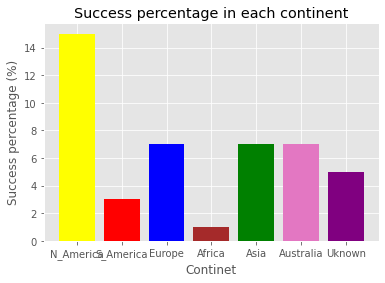

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = ['N_America', 'S_America', 'Europe', 'Africa', 'Asia', 'Australia','Uknown']
energy = [15, 3, 7, 1, 7, 7,5]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color=['yellow','red','blue','brown','green','tab:pink','purple'])
plt.xlabel("Continet")
plt.ylabel("Success percentage (%)")
plt.title("Success percentage in each continent")

plt.xticks(x_pos, x)

plt.show()

<BarContainer object of 4 artists>

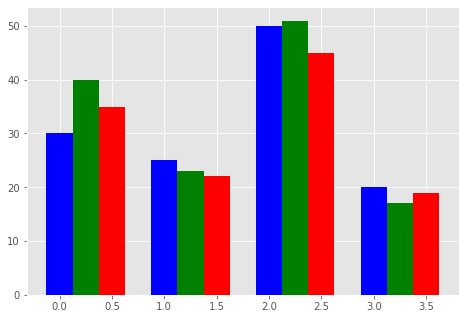

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

[Text(0, 0, 'Software'),
 Text(0, 0, 'Biotechnology'),
 Text(0, 0, 'E-Commerce'),
 Text(0, 0, 'Mobile')]

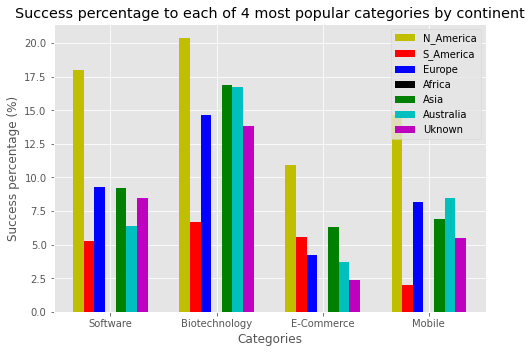

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = [
        [18, 20.4, 10.9, 14.6],
[5.3, 6.7, 5.6, 2],
[9.3, 14.6, 4.2, 8.2],
[0, 0, 0, 0],
[9.2, 16.9, 6.3, 6.9],
[6.4, 16.7, 3.7, 8.5],
[8.5, 13.8, 2.4, 5.5]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.3, data[0], color = 'y', width = 0.1)
ax.bar(X - 0.2, data[1], color = 'r', width = 0.1)
ax.bar(X - 0.1, data[2], color = 'b', width = 0.1)
ax.bar(X + 0.0, data[3], color = 'k', width = 0.1)
ax.bar(X + 0.1, data[4], color = 'g', width = 0.1)
ax.bar(X + 0.2, data[5], color = 'c', width = 0.1)
ax.bar(X + 0.3, data[6], color = 'm', width = 0.1)
ax.legend(labels=['N_America', 'S_America', 'Europe', 'Africa', 'Asia', 'Australia','Uknown'])
ax.set_ylabel('Success percentage (%)')
ax.set_xlabel('Categories')
ax.set_title('Success percentage to each of 4 most popular categories by continent')
ax.set_xticks(np.arange(-0.0, 3.5, 1))
ax.set_xticklabels(['Software','Biotechnology','E-Commerce','Mobile'])

In [ ]:
X.iloc[1,11]

1

In [ ]:
sum = 0
success = 0
for i in range(53583):
  #if y.iloc[i,0] == 1:
  if X.iloc[i,13] == 1 and X.iloc[i,22] == 1:
    sum += 1
    if y.iloc[i,0] == 1:
      success += 1

print(sum, success)
print(success/sum)

239 9
0.03765690376569038


In [ ]:
sum = 0
success = 0
for i in range(53583):
  if X.iloc[i,60] == 1:
    if y.iloc[i,0] == 1:
      success+=1
    elif y.iloc[i,0] == 0:
      sum+=1

In [ ]:
success

1338

In [ ]:
height = [7520,4792,4307,3402,2493,2387,2120,1792,1378,1371]
bars =  ["Software","Mobile","Biotechnology","E-Commerce","Curated Web","Enterprise Software","Health Care","Games","Clean Technology","Hardware + Software"]

In [ ]:
height = [55494,30524,6895,6094,4897,3257,2285,2200,1817,638,410,191,152,95]
bars =  ["venture","seed","debt financing","angel","undisclosed","equity crowdfunding","private equity","grant","convertible note","post ipo equity","product crowdfunding","non-equity assistance","post ipo debt","secondary market"]

In [ ]:
height = [14747,8713,4476,2025,811,283,73,12]
bars =  ["A","B","C","D","E","F","G","H"]

In [ ]:
index = pd.Index(bars)
ser = pd.Series(data=height, index=bars)

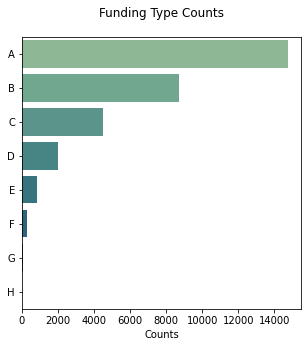

In [ ]:
import seaborn as sns
plt.figure()
ax1=sns.barplot(y=index,x=ser,orient='h',palette='crest')
#ax1=sns.barplot(y=market.index,x=market.category_list,orient='h',palette='Blues_r')
ax1.set_title('Funding Type Counts',pad=20)
ax1.set_xlabel('Counts')
plt.show()

In [ ]:
Software = 0
succcess = 0
others = 0
for i in range(53583):
  if X.iloc[i,18] == 1:
    Software += 1
    if y.iloc[i,0] == 1:
      succcess += 1

print(Software, succcess)
print(succcess / Software)
print(Software/53583)

7520 1130
0.1502659574468085
0.14034301924117723


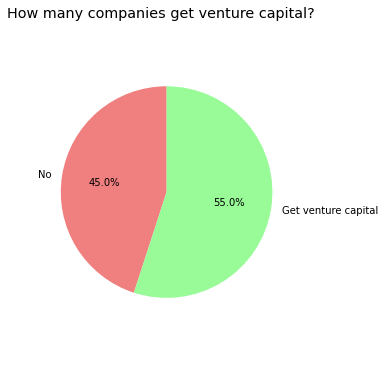

In [ ]:
plt.rcParams['figure.figsize'] = 5,5
labels = ['No','Get venture capital']
sizes = [0.45, 0.55]
explode = (0, 0)
colors =  ['lightcoral','palegreen'] 

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.axis('equal')
plt.tight_layout()
plt.title("How many companies get venture capital?", fontdict=None, position= [0.48,1.1], size = 'x-large')

plt.show()

In [ ]:
X['venture'].isna().sum()

0

In [ ]:
X['time to last fund'].mean()

12.188641920011944

In [ ]:
nan = 0
after = 0
bet = 0
bef = 0
a = 0
for i in range(53583):
  success = y.iloc[i,0]
  if success == 0:
    continue
  if X.iloc[i,60]==1:
    nan += 1
  elif X.iloc[i,59]==1:
    after += 1
  elif X.iloc[i,58]==1:
    bet += 1
  elif X.iloc[i,57]==1:
    bef += 1
  else:
    a += 1
print(bef,bet,after,nan)
print(a)

2494 1791 608 1338
0


In [ ]:
if y.iloc[2,0] == 0:
  print(type(y.iloc[2,0]))

<class 'numpy.int64'>


In [ ]:
for i in range(53583):
  #success = y.iloc[i,0]
  #if success == 0:
    #continue
  if X.iloc[i,2]==1:
    usa += 1
  elif X.iloc[i,3]==1:
    gbr += 1
  elif X.iloc[i,4]==1:
    can += 1
  elif X.iloc[i,5]==1:
    ind += 1
  elif X.iloc[i,6]==1:
    chn += 1
  elif X.iloc[i,7]==1:
    fra += 1
  elif X.iloc[i,8]==1:
    deu += 1
  elif X.iloc[i,9]==1:
    isr += 1
  elif X.iloc[i,10]==1:
    esp += 1
  else:
    a +=1
  #10 countries are ok
  if X.iloc[i,11]==1:
    N_America += 1	 	 	 	 	 	
  elif X.iloc[i,12]==1:
    S_America += 1
  elif X.iloc[i,13]==1:
    Europe += 1
  elif X.iloc[i,14]==1:
    Africa += 1
  elif X.iloc[i,15]==1:
    Asia += 1
  elif X.iloc[i,16]==1:
    Australia += 1
  elif X.iloc[i,17]==1:
    Unknown += 1
  else:
    b+=1
print(usa, gbr, can, ind, chn, fra, deu, isr, esp)
print(N_America, S_America, Europe, Africa, Asia, Australia, Unknown)
print(a,b)

4767 217 217 47 94 80 64 120 32
4989 24 608 2 342 35 231
593 0


In [ ]:
X.head()

,funding_total_usd,funding_rounds,USA,GBR,CAN,IND,CHN,FRA,DEU,ISR,ESP,N_America,S_America,Europe,Africa,Asia,Australia,Unknown,Software,Biotechnology,E-Commerce,Mobile,Clean Technology,Curated Web,Hardware + Software,Health Care,Games,Enterprise Software,Others,A,B,C,D,E,F,G,H,venture,seed,debt_financing,angel,undisclosed,equity_crowdfunding,private_equity,grant,convertible_note,post_ipo_equity,product_crowdfunding,non_equity_assistance,post_ipo_debt,secondary_market,investors,successes,experience,acquirers,acquirers_successes,acquirers_experience,before 2005,2005 to 2010,after 2010,nan_Founded,time to 1st fund,unknown fund,time to last fund
0,10000000.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,700000.0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-6,0,7
2,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,2000000.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,13,0,0,0,0,1,0,0,14,0,0
4,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,162,0,0,0,0,0,0,1,0,1,0


In [ ]:
nan = 0
bef = 0
bet=0
after=0
for i in range(53583):
  #if y.iloc[i,0] == 0:
   # continue
  if X.iloc[i,60] == 1:
    nan += 1
  elif X.iloc[i,57] == 1:
    bef+=1
  elif X.iloc[i,58] == 1:
    bet+=1
  elif X.iloc[i,59] == 1:
    after +=1
print(nan,bef,bet,after)
print(nan/53583)
print(bef/53583)
print(bet/53583)
print(after/53583)

11692 8571 13765 19555
0.21820353470317078
0.15995744919097474
0.2568911781721815
0.36494783793367297


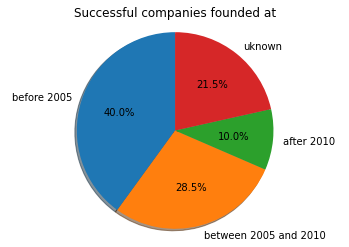

In [ ]:
#successful
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'before 2005', 'between 2005 and 2010', 'after 2010', 'uknown'
sizes = [40, 28.5, 10, 21.5]
explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.title.set_text('Successful companies founded at')
plt.show()

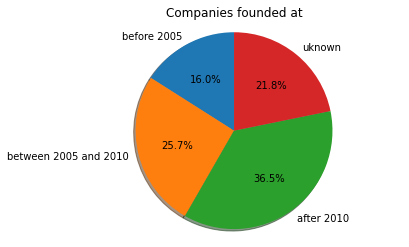

In [ ]:
#general 
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'before 2005', 'between 2005 and 2010', 'after 2010', 'uknown'
sizes = [16, 25.7, 36.5, 21.8]
explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.title.set_text('Companies founded at')



plt.show()

## Dataframe

In [ ]:
X = pd.read_csv('dataframe.csv')
X.shape

(53583, 999)

In [ ]:
X = X.drop(X.columns[0], axis=1)
X.head()

,funding_total_usd,funding_rounds,country_code_ALB,country_code_ARE,country_code_ARG,country_code_ARM,country_code_AUS,country_code_AUT,country_code_AZE,country_code_BAH,country_code_BEL,country_code_BGD,country_code_BGR,country_code_BHR,country_code_BLM,country_code_BLR,country_code_BLZ,country_code_BMU,country_code_BRA,country_code_BRB,country_code_BWA,country_code_CAN,country_code_CHE,country_code_CHL,country_code_CHN,country_code_CIV,country_code_CMR,country_code_COL,country_code_CRI,country_code_CYM,country_code_CYP,country_code_CZE,country_code_DEU,country_code_DMA,country_code_DNK,country_code_DOM,country_code_DZA,country_code_ECU,country_code_EGY,country_code_ESP,...,Visualization,VoIP,Vulnerability Management,Waste Management,Watch,Water,Water Purification,Wealth Management,Wearables,Web Browsers,Web CMS,Web Design,Web Development,Web Hosting,Web Presence Management,Web Tools,WebOS,Weddings,West Africa,Wholesale,Wind,Windows Phone 7,Wine And Spirits,Wireless,Women,Writers,Young Adults,iOS,iPad,iPhone,iPod Touch,mHealth,A,B,C,D,E,F,G,H
0,10000000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0
1,700000.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3406878.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,41250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Dataframe 10 attributes

In [ ]:
X = pd.read_csv('Dataframe10attrib.csv')
X = X.drop(X.columns[0], axis=1)
X.head()

,funding_total_usd,funding_rounds,A,B,C,D,E,F,G,H
0,10000000.0,1,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0
1,700000.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3406878.0,1,0.0,3406878.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000000.0,1,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,41250.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.shape

(53583, 10)

In [ ]:
for j in range(53583):
  for i in X.loc[j].shape:
    if not(i==10):
      print(j)

## Labels

In [ ]:
y = pd.read_csv('labels.csv')
y.shape

(53583, 2)

In [ ]:
y = y.drop(y.columns[0], axis=1)
y.head()

,status
0,0
1,0
2,0
3,0
4,0


In [ ]:
y.value_counts('status')

status
0    47352
1     6231
dtype: int64

## Correlation 

In [ ]:
X = X[['funding_total_usd','funding_rounds']]
X['status'] = y
X.head()

,funding_total_usd,funding_rounds,status
0,10000000.0,1,0
1,700000.0,2,0
2,3406878.0,1,0
3,2000000.0,1,0
4,41250.0,1,0


In [ ]:
X['funding_rounds'].value_counts()

1     30789
2     11477
3      5447
4      2697
5      1456
6       768
7       416
8       213
9       125
10       76
11       51
12       28
13       15
14        6
15        6
16        6
18        3
17        3
19        1
Name: funding_rounds, dtype: int64

In [ ]:
df = X.loc[X['funding_rounds'] == 10]
df['status'].value_counts()

0    53
1    23
Name: status, dtype: int64

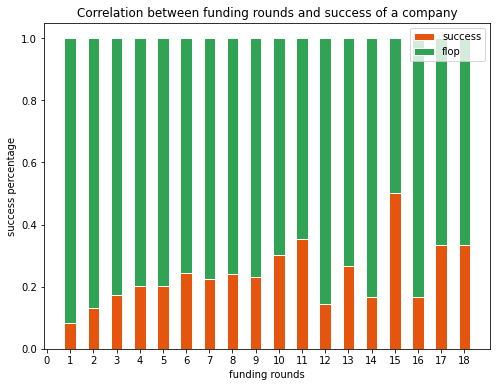

In [ ]:
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
plt.figure(figsize=(8,6))
status_cont=X.groupby('funding_rounds')['status'].value_counts(normalize=True)
cont=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
status_cont=status_cont.loc[cont].unstack().T
plt.bar(status_cont.columns,status_cont.loc[1],color=outer_colors[1],label='success',width=0.5,edgecolor='w')
plt.bar(status_cont.columns,status_cont.loc[0],bottom=status_cont.loc[1],color=outer_colors[2],label='flop',width=0.5,edgecolor='w')
plt.legend()
plt.title('Correlation between funding rounds and success of a company')
plt.xlabel('funding rounds')
plt.ylabel('success percentage')
bars = ('0','1', '2', '3', '4', '5', '6','7','8','9','10','11','12','13','14','15','16','17','18')
x_pos = np.arange(len(bars))
plt.xticks(x_pos, bars)
plt.show()

In [ ]:
X.corr(method ='pearson') 

,funding_total_usd,funding_rounds,status
funding_total_usd,1.000000,0.112909,0.071326
funding_rounds,0.112909,1.000000,0.134425
status,0.071326,0.134425,1.000000


In [ ]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(X)
p 

0.0

## Dataset (1) without MinMax

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape

(42866, 10)

## TSNE

In [ ]:
n=500
X_data = X[:n]
y_data = y.to_numpy()
y_data = y_data[:n]

In [ ]:
from sklearn.manifold import TSNE
#X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(X_data)
X_embedded.shape

(500, 2)

In [ ]:
result = np.where(y_data == 1)
result

(array([ 11,  16,  18,  26,  27,  51,  60,  76, 108, 109, 130, 143, 146,
        154, 156, 163, 187, 203, 228, 233, 234, 237, 253, 255, 257, 269,
        273, 283, 285, 288, 310, 330, 331, 336, 342, 345, 348, 350, 352,
        354, 357, 359, 365, 368, 384, 415, 423, 434, 453, 471, 486, 487,
        490, 497, 498]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

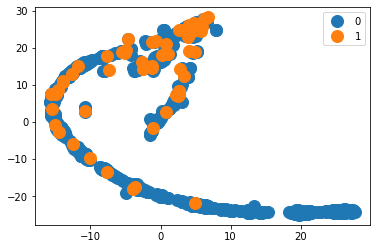

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

vis_x = X_embedded[:, 0]
vis_y = X_embedded[:, 1]
labels = y_data.ravel()

df = pd.DataFrame(dict(x=vis_x, y=vis_y, label=labels))

groups = df.groupby('label')

# Plot
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



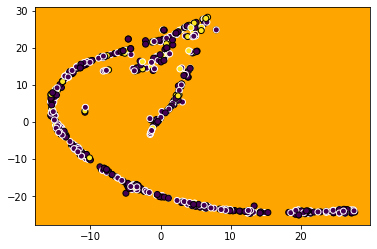

In [ ]:
from matplotlib import pyplot as plt
# plot the result
vis_x = X_embedded[:, 0]
vis_y = X_embedded[:, 1]

plt.scatter(vis_x, vis_y, c=y_data, edgecolors=['white', 'black'])
#plt.colorbar(ticks=range(10))
#plt.clim(-0.5, 9.5)
ax = plt.axes()
ax.set_facecolor("orange")
plt.show()

## MinMax

Μη ισοζυγισμένο. Πρώτα τα ισοζυγιζω και μετα μοντέλο

In [ ]:
import sklearn
print(sklearn.__version__)
#must be up to 0.23 

0.24.1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sdss = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(sdss, y, test_size=0.2)
y_test = y_test['status'].values

In [ ]:
print(y_train, sdss)

       status
27407       0
25188       0
46072       0
31512       0
21158       0
...       ...
10159       1
30082       0
4214        1
8474        0
9682        1

[42866 rows x 1 columns] [[3.32452268e-04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.32716279e-05 5.55555556e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.13262410e-04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [3.80002954e-06 1.66666667e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.04763982e-07 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.93691668e-07 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


Τα δυο επόμενα κελιά δεν θυμάμαι γιατί τα έχω

In [ ]:
len = y_train.shape
Label_train = np.zeros(len)
for i in len:
  if y_train[i] == '1':
    Label_train[i] = 1

In [ ]:
Label_train.astype(int)
Label_train.astype(str)
type(Label_train[0])

numpy.float64

## StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sdss = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(sdss, y, test_size=0.2)
y_test = y_test['status'].values

**Διαλέγω SMOTE ή OverSampling**

## SMOTE

In [ ]:
import imblearn
print(imblearn.__version__)

0.8.0


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=0.5, n_jobs=-1)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
type(y_train)

pandas.core.frame.DataFrame

In [ ]:
y_train.shape

(56754, 1)

**Download** X_train, y_train

In [ ]:
# save numpy array as npy file
from numpy import asarray
from numpy import save

# save to npy file
save('X_train_SMOTE.npy', X_train)

In [ ]:
from google.colab import files

y_train.to_csv('y_train_SMOTE.csv')
files.download('y_train_SMOTE.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## OverSampling

In [ ]:

# check version number
import imblearn
print(imblearn.__version__)

0.8.0


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn import preprocessing
# αρχικοποίηση του RandomOverSampler
ros = RandomOverSampler(sampling_strategy=0.5)
# o RandomOverSampler θέλει τις ετικέτες όχι ως δυαδικό διάνυσμα αλλά ως αριθμό κλάσης. 
# το [0 0 1 0 0] πρέπει να γίνει 2 κοκ

#mlb = LabelEncoder().fit(['0', '1'])
#tmplabels = np.asarray(mlb.inverse_transform(Label_train)).flatten()
train_resampled, trainTargets_resampled = ros.fit_resample(X_train, y_train)
# ξαναφέρνουμε τα labels σε binary μορφή
#trainTargets_resampled = mlb.transform(trainTargets_resampled)

# εκτυπώνουμε τις νέες διαστάσεις του train set
print(train_resampled.shape)
print(trainTargets_resampled.shape)
# επιβεβαιώνουμε ότι τα labels είναι στη binary μορφή
print(trainTargets_resampled)
# επιβεβαιώνουμε ότι το training set έχει εξισορροπηθεί με oversampling
summ = trainTargets_resampled.value_counts()   #trainTargets_resampled.T.sum(axis=1)
print(summ) #πλήθος ανα κλάση 
print(summ.sum()) #σύνολο δειγμάτων
X_train = train_resampled
y_train = trainTargets_resampled

(75764, 10)
(75764, 1)
       status
0           0
1           0
2           0
3           0
4           0
...       ...
75759       1
75760       1
75761       1
75762       1
75763       1

[75764 rows x 1 columns]
status
1         37882
0         37882
dtype: int64
75764


In [ ]:
y.value_counts()

status
0         48793
1          4790
dtype: int64

In [ ]:
print(preds)

['0' '0' '0' ... '0' '0' '0']


## Load SMOTE

In [ ]:
# load numpy array from npy file
from numpy import load
# load array
X_train = load('X_train_SMOTE.npy')

In [ ]:
y_train = pd.read_csv('y_train_SMOTE.csv')
y_train = y_train.drop(y_train.columns[0], axis=1)

# Models

https://www.kaggle.com/lucidlenn/data-analysis-and-classification-using-xgboost

https://www.kaggle.com/babatee/intro-xgboost-classification

https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
training_start = time.perf_counter()
clf.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = clf.predict(X_test)
prediction_end = time.perf_counter()
#acc_knn = (preds == y_test).sum().astype(float) / preds.shape*100
precision_lr = precision_score(y_test, preds, average='macro')
recall_lr = recall_score(y_test, preds, average='macro')
f1_lr = f1_score(y_test, preds, average='macro')
lr_train_time = training_end-training_start

lr_prediction_time = prediction_end-prediction_start
#print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))

print("Time consumed for training: %4.3f seconds" % (lr_train_time))
print("Time consumed for prediction: %6.5f seconds" % (lr_prediction_time))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds, target_names=['not_acquired', 'acquired']))

Time consumed for training: 0.130 seconds
Time consumed for prediction: 0.00061 seconds
[[9451   25]
 [1224   17]]
              precision    recall  f1-score   support

not_acquired       0.89      1.00      0.94      9476
    acquired       0.40      0.01      0.03      1241

    accuracy                           0.88     10717
   macro avg       0.65      0.51      0.48     10717
weighted avg       0.83      0.88      0.83     10717



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



## K Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier()
training_start = time.perf_counter()
knn.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = knn.predict(X_test)
prediction_end = time.perf_counter()
#acc_knn = (preds == y_test).sum().astype(float) / preds.shape*100
precision_knn = precision_score(y_test, preds, average='macro')
recall_knn = recall_score(y_test, preds, average='macro')
f1_knn = f1_score(y_test, preds, average='macro')
knn_train_time = training_end-training_start

knn_prediction_time = prediction_end-prediction_start
#print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))

print("Time consumed for training: %4.3f seconds" % (knn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds, target_names=['not_acquired', 'acquired']))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Time consumed for training: 0.069 seconds
Time consumed for prediction: 45.75258 seconds
[[7691 1736]
 [ 777  513]]
              precision    recall  f1-score   support

not_acquired       0.91      0.82      0.86      9427
    acquired       0.23      0.40      0.29      1290

    accuracy                           0.77     10717
   macro avg       0.57      0.61      0.57     10717
weighted avg       0.83      0.77      0.79     10717



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, preds))


[[9119  342]
 [1134  122]]


## Gaussian Naive Bayes

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
scaler_gnb = MaxAbsScaler()
sdss = scaler_gnb.fit_transform(X)
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(sdss, y, test_size=0.33)

gnb = GaussianNB()
training_start = time.perf_counter()
gnb.fit(X_train_gnb, y_train_gnb)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = gnb.predict(X_test_gnb)
prediction_end = time.perf_counter()
#acc_gnb = (preds == y_test_gnb).sum().astype(float) / preds.shape*100
precision_gnb = precision_score(y_test_gnb, preds, average='macro')
recall_gnb = recall_score(y_test_gnb, preds, average='macro')
f1_gnb = f1_score(y_test_gnb, preds, average='macro')
gnb_train_time = training_end-training_start
gnb_prediction_time = prediction_end-prediction_start
#print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnb))
print("Time consumed for training: %4.3f seconds" % (gnb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (gnb_prediction_time))
print(confusion_matrix(y_test_gnb, preds))
print(classification_report(y_test_gnb, preds, target_names=['not_acquired', 'acquired']))

Time consumed for training: 0.054 seconds
Time consumed for prediction: 0.01884 seconds
[[14883   775]
 [ 1272   753]]
              precision    recall  f1-score   support

not_acquired       0.92      0.95      0.94     15658
    acquired       0.49      0.37      0.42      2025

    accuracy                           0.88     17683
   macro avg       0.71      0.66      0.68     17683
weighted avg       0.87      0.88      0.88     17683



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



## XGBoost

In [ ]:
xgb = XGBClassifier()
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
#acc_xgb = (preds == y_test).sum().astype(float) /  preds.shape*100
precision_xgb = precision_score(y_test, preds, average='macro')
recall_xgb = recall_score(y_test, preds, average='macro')
f1_xgb = f1_score(y_test, preds, average='macro')
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
#print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))
XGB_matrix = confusion_matrix(y_test, preds)
print(XGB_matrix)
print(classification_report(y_test, preds, target_names=['not_acquired', 'acquired']))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Time consumed for training: 6.158
Time consumed for prediction: 0.03315 seconds
[[8422 1061]
 [ 713  521]]
              precision    recall  f1-score   support

not_acquired       0.92      0.89      0.90      9483
    acquired       0.33      0.42      0.37      1234

    accuracy                           0.83     10717
   macro avg       0.63      0.66      0.64     10717
weighted avg       0.85      0.83      0.84     10717



## Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
#acc_rfc = (preds == y_test).sum().astype(float) /  preds.shape*100
precision_rfc = precision_score(y_test, preds, average='macro')
recall_rfc = recall_score(y_test, preds, average='macro')
f1_rfc = f1_score(y_test, preds, average='macro')
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
#print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds, target_names=['not_acquired', 'acquired']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Time consumed for training: 0.650 seconds
Time consumed for prediction: 0.03019 seconds
[[8321 1196]
 [ 852  348]]
              precision    recall  f1-score   support

not_acquired       0.91      0.87      0.89      9517
    acquired       0.23      0.29      0.25      1200

    accuracy                           0.81     10717
   macro avg       0.57      0.58      0.57     10717
weighted avg       0.83      0.81      0.82     10717



## Support Vector Machine Classifier


In [ ]:
svc = SVC()
training_start = time.perf_counter()
svc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = svc.predict(X_test)
prediction_end = time.perf_counter()
#acc_svc = (preds == y_test).sum().astype(float) /  preds.shape*100
precision_svc = precision_score(y_test, preds, average='macro')
recall_svc = recall_score(y_test, preds, average='macro')
f1_svc = f1_score(y_test, preds, average='macro')
svc_train_time = training_end-training_start
svc_prediction_time = prediction_end-prediction_start
#print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svc))
print("Time consumed for training: %4.3f seconds" % (svc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (svc_prediction_time))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds, target_names=['not_acquired', 'acquired']))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Time consumed for training: 281.902 seconds
Time consumed for prediction: 27.93312 seconds
[[8690  719]
 [ 596  712]]
              precision    recall  f1-score   support

not_acquired       0.94      0.92      0.93      9409
    acquired       0.50      0.54      0.52      1308

    accuracy                           0.88     10717
   macro avg       0.72      0.73      0.72     10717
weighted avg       0.88      0.88      0.88     10717



# Results (+ ipo)

## Overview data (new) 64 features + SMOTE (0.5) StandardScaler

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    #'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Precision': [precision_lr, precision_knn, precision_gnb, precision_xgb, precision_rfc, precision_svc],
    'Recall': [recall_lr, recall_knn, recall_gnb, recall_xgb, recall_rfc, recall_svc],
    'f1_score': [f1_lr, f1_knn, f1_gnb, f1_xgb, f1_rfc, f1_svc],
    'Runtime Training': [lr_train_time, knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [lr_prediction_time, knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
#result_df = results.sort_values(by='Score', ascending=False)
print(XGB_matrix)

result_df = results.sort_values(by='f1_score', ascending=False)
result_df = result_df.set_index('Model')
result_df

[[8824  585]
 [ 643  665]]


,Precision,Recall,f1_score,Runtime Training,Runtime Prediction
Model,,,,,
XGBoost,0.732040,0.723118,0.727441,9.577990,0.037619
SVC,0.716686,0.733963,0.724779,281.901932,27.933124
Logistic Regression,0.701262,0.734849,0.715841,1.642043,0.002234
Random Forest,0.738509,0.680503,0.703452,1.220617,0.038820
Naive Bayes,0.707032,0.661178,0.679761,0.054149,0.018842
KNN,0.654751,0.713159,0.674871,0.017583,16.060840


## Overview data (new) 51 features + investors + acquirers + SMOTE (0.5) StandardScaler

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    #'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Precision': [precision_lr, precision_knn, precision_gnb, precision_xgb, precision_rfc, precision_svc],
    'Recall': [recall_lr, recall_knn, recall_gnb, recall_xgb, recall_rfc, recall_svc],
    'f1_score': [f1_lr, f1_knn, f1_gnb, f1_xgb, f1_rfc, f1_svc],
    'Runtime Training': [lr_train_time, knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [lr_prediction_time, knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
#result_df = results.sort_values(by='Score', ascending=False)
print(XGB_matrix)

result_df = results.sort_values(by='f1_score', ascending=False)
result_df = result_df.set_index('Model')
result_df

[[8887  614]
 [ 655  561]]


,Precision,Recall,f1_score,Runtime Training,Runtime Prediction
Model,,,,,
Logistic Regression,0.706872,0.706872,0.706872,1.532149,0.002129
SVC,0.704424,0.708951,0.706648,271.185387,36.078999
XGBoost,0.704401,0.698362,0.701311,8.576849,0.036863
Random Forest,0.707399,0.664506,0.682197,0.971901,0.037096
Naive Bayes,0.698312,0.649059,0.668324,0.049787,0.018984
KNN,0.637352,0.702270,0.657607,0.009099,15.875605


## Overview data (new) 51 features + investors + SMOTE (0.5) StandardScaler

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    #'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Precision': [precision_lr, precision_knn, precision_gnb, precision_xgb, precision_rfc, precision_svc],
    'Recall': [recall_lr, recall_knn, recall_gnb, recall_xgb, recall_rfc, recall_svc],
    'f1_score': [f1_lr, f1_knn, f1_gnb, f1_xgb, f1_rfc, f1_svc],
    'Runtime Training': [lr_train_time, knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [lr_prediction_time, knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
#result_df = results.sort_values(by='Score', ascending=False)
print(XGB_matrix)

result_df = results.sort_values(by='f1_score', ascending=False)
result_df = result_df.set_index('Model')
result_df

[[8693  834]
 [ 634  556]]


,Precision,Recall,f1_score,Runtime Training,Runtime Prediction
Model,,,,,
XGBoost,0.666013,0.689843,0.676573,8.128724,0.035243
Logistic Regression,0.667175,0.679441,0.672945,1.542632,0.001633
SVC,0.659146,0.681545,0.669080,268.925902,38.203883
Random Forest,0.640641,0.625919,0.632585,0.886151,0.032967
KNN,0.610483,0.676791,0.627041,0.014024,14.611417
Naive Bayes,0.577219,0.677786,0.549071,0.032347,0.017458


## Overview data (new) 51 features + SMOTE (0.5) StandardScaler

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    #'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Precision': [precision_lr, precision_knn, precision_gnb, precision_xgb, precision_rfc, precision_svc],
    'Recall': [recall_lr, recall_knn, recall_gnb, recall_xgb, recall_rfc, recall_svc],
    'f1_score': [f1_lr, f1_knn, f1_gnb, f1_xgb, f1_rfc, f1_svc],
    'Runtime Training': [lr_train_time, knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [lr_prediction_time, knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
#result_df = results.sort_values(by='Score', ascending=False)
print(XGB_matrix)

result_df = results.sort_values(by='f1_score', ascending=False)
result_df = result_df.set_index('Model')
result_df

[[8607  908]
 [ 662  540]]


,Precision,Recall,f1_score,Runtime Training,Runtime Prediction
Model,,,,,
XGBoost,0.650754,0.676911,0.661983,7.178612,0.031443
SVC,0.642646,0.631525,0.636699,297.219081,33.762920
Logistic Regression,0.631728,0.641374,0.636241,1.440778,0.001419
KNN,0.602522,0.648488,0.616341,0.012836,13.624004
Random Forest,0.602526,0.608555,0.605369,0.902636,0.036441
Naive Bayes,0.567360,0.664055,0.514476,0.030800,0.014645


## Overview data (new) 51 features + SMOTE (0.5) MinMax

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    #'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Precision': [precision_lr, precision_knn, precision_gnb, precision_xgb, precision_rfc, precision_svc],
    'Recall': [recall_lr, recall_knn, recall_gnb, recall_xgb, recall_rfc, recall_svc],
    'f1_score': [f1_lr, f1_knn, f1_gnb, f1_xgb, f1_rfc, f1_svc],
    'Runtime Training': [lr_train_time, knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [lr_prediction_time, knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
#result_df = results.sort_values(by='Score', ascending=False)
print(XGB_matrix)

result_df = results.sort_values(by='f1_score', ascending=False)
result_df = result_df.set_index('Model')
result_df

[[8480 1000]
 [ 736  501]]


,Precision,Recall,f1_score,Runtime Training,Runtime Prediction
Model,,,,,
XGBoost,0.626958,0.649763,0.636553,7.290122,0.030990
Logistic Regression,0.613173,0.616340,0.614714,1.538985,0.001467
SVC,0.625233,0.600405,0.610377,269.606821,36.131241
KNN,0.586244,0.618931,0.596388,0.013114,13.211551
Random Forest,0.593815,0.596832,0.595273,0.812808,0.036010
Naive Bayes,0.569516,0.670714,0.517007,0.034491,0.023221


## Overview data (new) 43 features + SMOTE (0.5) StandardScaler

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    #'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Precision': [precision_lr, precision_knn, precision_gnb, precision_xgb, precision_rfc, precision_svc],
    'Recall': [recall_lr, recall_knn, recall_gnb, recall_xgb, recall_rfc, recall_svc],
    'f1_score': [f1_lr, f1_knn, f1_gnb, f1_xgb, f1_rfc, f1_svc],
    'Runtime Training': [lr_train_time, knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [lr_prediction_time, knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
#result_df = results.sort_values(by='Score', ascending=False)
print(XGB_matrix)

result_df = results.sort_values(by='f1_score', ascending=False)
result_df = result_df.set_index('Model')
result_df

[[8420 1029]
 [ 737  531]]


,Precision,Recall,f1_score,Runtime Training,Runtime Prediction
Model,,,,,
XGBoost,0.629950,0.654935,0.640307,6.260749,0.033135
SVC,0.635037,0.623620,0.628873,282.673857,35.993973
Logistic Regression,0.611102,0.619630,0.615048,0.765134,0.001241
KNN,0.591093,0.627681,0.602069,0.008573,14.219483
Random Forest,0.583044,0.585189,0.584086,0.771301,0.035472
Naive Bayes,0.562627,0.649092,0.505534,0.027079,0.012715


## Overview data (new) 43 features + SMOTE (0.5) MinMax

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    #'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Precision': [precision_lr, precision_knn, precision_gnb, precision_xgb, precision_rfc, precision_svc],
    'Recall': [recall_lr, recall_knn, recall_gnb, recall_xgb, recall_rfc, recall_svc],
    'f1_score': [f1_lr, f1_knn, f1_gnb, f1_xgb, f1_rfc, f1_svc],
    'Runtime Training': [lr_train_time, knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [lr_prediction_time, knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
#result_df = results.sort_values(by='Score', ascending=False)
print(XGB_matrix)

result_df = results.sort_values(by='f1_score', ascending=False)
result_df = result_df.set_index('Model')
result_df

[[8423 1049]
 [ 725  520]]


,Precision,Recall,f1_score,Runtime Training,Runtime Prediction
Model,,,,,
XGBoost,0.626084,0.653462,0.637153,6.425824,0.030009
Logistic Regression,0.599787,0.608964,0.603954,1.515587,0.001851
KNN,0.587185,0.625127,0.597952,0.012119,13.423139
Random Forest,0.591485,0.598660,0.594779,0.755468,0.038141
SVC,0.605849,0.576814,0.586985,264.773323,38.778769
Naive Bayes,0.563159,0.650512,0.500808,0.027780,0.011619


## Overview data (5) 37 features + SMOTE (0.5) StandardScaler

In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    #'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Precision': [precision_knn, precision_gnb, precision_xgb, precision_rfc, precision_svc],
    'Recall': [recall_knn, recall_gnb, recall_xgb, recall_rfc, recall_svc],
    'f1_score': [f1_knn, f1_gnb, f1_xgb, f1_rfc, f1_svc],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
#result_df = results.sort_values(by='Score', ascending=False)
print(XGB_matrix)

result_df = results.sort_values(by='f1_score', ascending=False)
result_df = result_df.set_index('Model')
result_df

[[8405 1053]
 [ 737  522]]


,Precision,Recall,f1_score,Runtime Training,Runtime Prediction
Model,,,,,
XGBoost,0.625406,0.651640,0.636074,5.622795,0.022676
SVC,0.642673,0.607675,0.620989,219.861024,35.614563
KNN,0.589839,0.624132,0.600452,0.010979,15.785216
Random Forest,0.578119,0.590751,0.583299,0.774107,0.036093
Naive Bayes,0.556805,0.603985,0.556729,0.026012,0.012057


## Overview data (5) 37 features + SMOTE (0.5) MinMax

In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    #'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Precision': [precision_knn, precision_gnb, precision_xgb, precision_rfc, precision_svc],
    'Recall': [recall_knn, recall_gnb, recall_xgb, recall_rfc, recall_svc],
    'f1_score': [f1_knn, f1_gnb, f1_xgb, f1_rfc, f1_svc],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
#result_df = results.sort_values(by='Score', ascending=False)
print(XGB_matrix)

result_df = results.sort_values(by='f1_score', ascending=False)
result_df = result_df.set_index('Model')
result_df

[[8262 1162]
 [ 723  570]]


,Precision,Recall,f1_score,Runtime Training,Runtime Prediction
Model,,,,,
XGBoost,0.624316,0.658767,0.637232,5.950101,0.032418
KNN,0.592064,0.624149,0.602413,0.015358,14.277978
Random Forest,0.582912,0.598229,0.589012,0.777213,0.034508
SVC,0.608453,0.543908,0.551906,234.898945,36.524098
Naive Bayes,0.560119,0.643373,0.517015,0.037405,0.029195


## Overview data (4) 998 features + SMOTE

In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    #'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Precision': [precision_knn, precision_gnb, precision_xgb, precision_rfc, precision_svc],
    'Recall': [recall_knn, recall_gnb, recall_xgb, recall_rfc, recall_svc],
    'f1_score': [f1_knn, f1_gnb, f1_xgb, f1_rfc, f1_svc],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
#result_df = results.sort_values(by='Score', ascending=False)
print(XGB_matrix)

result_df = results.sort_values(by='f1_score', ascending=False)
result_df = result_df.set_index('Model')
result_df

[[8332 1162]
 [ 708  515]]


,Precision,Recall,f1_score,Runtime Training,Runtime Prediction
Model,,,,,
XGBoost,0.614389,0.649351,0.627138,111.871017,0.128572
Random Forest,0.592993,0.587034,0.589811,6.775757,0.110322
SVC,0.586124,0.584586,0.585340,2252.309638,413.964073
KNN,0.563179,0.606100,0.568149,0.046557,56.373466
Naive Bayes,0.539473,0.530596,0.193645,0.579345,0.230114


## Overview data (3) SMOTE (1.0) MinMax

In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    #'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Precision': [precision_knn, precision_gnb, precision_xgb, precision_rfc, precision_svc],
    'Recall': [recall_knn, recall_gnb, recall_xgb, recall_rfc, recall_svc],
    'f1_score': [f1_knn, f1_gnb, f1_xgb, f1_rfc, f1_svc],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
#result_df = results.sort_values(by='Score', ascending=False)
print(XGB_matrix)

result_df = results.sort_values(by='f1_score', ascending=False)
result_df = result_df.set_index('Model')
result_df

[[6406 3070]
 [ 368  873]]


,Precision,Recall,f1_score,Runtime Training,Runtime Prediction
Model,,,,,
XGBoost,0.583540,0.689744,0.562618,3.690605,0.027270
KNN,0.557016,0.600837,0.558266,5.981016,1.386303
SVC,0.561116,0.619527,0.556982,389.313467,41.603419
Random Forest,0.556555,0.604381,0.555429,0.935516,0.032238
Naive Bayes,0.573362,0.543589,0.550434,0.014938,0.004641


## Overview data (3) SMOTE (0.5) MinMax

In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    #'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Precision': [precision_knn, precision_gnb, precision_xgb, precision_rfc, precision_svc],
    'Recall': [recall_knn, recall_gnb, recall_xgb, recall_rfc, recall_svc],
    'f1_score': [f1_knn, f1_gnb, f1_xgb, f1_rfc, f1_svc],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
#result_df = results.sort_values(by='Score', ascending=False)
print(XGB_matrix)

result_df = results.sort_values(by='f1_score', ascending=False)
result_df = result_df.set_index('Model')
result_df

[[8072 1390]
 [ 668  587]]


,Precision,Recall,f1_score,Runtime Training,Runtime Prediction
Model,,,,,
XGBoost,0.610242,0.660413,0.625089,2.697793,0.026931
KNN,0.557016,0.600837,0.558266,5.981016,1.386303
SVC,0.561116,0.619527,0.556982,389.313467,41.603419
Random Forest,0.556555,0.604381,0.555429,0.935516,0.032238
Naive Bayes,0.573362,0.543589,0.550434,0.014938,0.004641


## Overview data (2) OverSampling (1.0) MinMax

In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    #'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Precision': [precision_knn, precision_gnb, precision_xgb, precision_rfc, precision_svc],
    'Recall': [recall_knn, recall_gnb, recall_xgb, recall_rfc, recall_svc],
    'f1_score': [f1_knn, f1_gnb, f1_xgb, f1_rfc, f1_svc],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
#result_df = results.sort_values(by='Score', ascending=False)
print(XGB_matrix)

result_df = results.sort_values(by='f1_score', ascending=False)
result_df = result_df.set_index('Model')
result_df

[[6247 3206]
 [ 328  936]]


,Precision,Recall,f1_score,Runtime Training,Runtime Prediction
Model,,,,,
SVC,0.568826,0.634084,0.565991,364.259485,41.851035
XGBoost,0.588046,0.700677,0.562896,3.486065,0.028805
KNN,0.563359,0.620933,0.560813,2.878602,2.374273
Naive Bayes,0.578433,0.551542,0.559035,0.013240,0.004861
Random Forest,0.546746,0.572311,0.549535,0.745366,0.025140


## Overview data (2) OverSampling (0.5) StandardScaler

In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    #'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Precision': [precision_knn, precision_gnb, precision_xgb, precision_rfc, precision_svc],
    'Recall': [recall_knn, recall_gnb, recall_xgb, recall_rfc, recall_svc],
    'f1_score': [f1_knn, f1_gnb, f1_xgb, f1_rfc, f1_svc],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
#result_df = results.sort_values(by='Score', ascending=False)
print(XGB_matrix)

result_df = results.sort_values(by='f1_score', ascending=False)
result_df = result_df.set_index('Model')
result_df

[[8025 1505]
 [ 627  560]]


,Precision,Recall,f1_score,Runtime Training,Runtime Prediction
Model,,,,,
XGBoost,0.599359,0.656928,0.613572,2.560896,0.025796
SVC,0.599373,0.598198,0.598778,176.208121,23.569809
KNN,0.566034,0.592192,0.573429,4.080442,1.274271
Random Forest,0.565756,0.570215,0.567807,0.638578,0.032065
Naive Bayes,0.587129,0.535896,0.541286,0.013643,0.008650


## Overview data (1) with StandardScaler

In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    #'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Precision': [precision_knn, precision_gnb, precision_xgb, precision_rfc, precision_svc],
    'Recall': [recall_knn, recall_gnb, recall_xgb, recall_rfc, recall_svc],
    'f1_score': [f1_knn, f1_gnb, f1_xgb, f1_rfc, f1_svc],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
#result_df = results.sort_values(by='Score', ascending=False)
print(XGB_matrix)

result_df = results.sort_values(by='f1_score', ascending=False)
result_df = result_df.set_index('Model')
result_df

[[9443    9]
 [1257    8]]


,Precision,Recall,f1_score,Runtime Training,Runtime Prediction
Model,,,,,
Naive Bayes,0.587291,0.548444,0.556717,0.016171,0.004858
Random Forest,0.569919,0.529019,0.531460,0.517797,0.028582
KNN,0.584269,0.528035,0.529213,2.362398,1.595207
XGBoost,0.676556,0.502686,0.474829,2.017265,0.026625
SVC,0.512418,0.500078,0.469291,47.626741,7.463001


## Overview data (1) with MinMax

In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    #'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Precision': [precision_knn, precision_gnb, precision_xgb, precision_rfc, precision_svc],
    'Recall': [recall_knn, recall_gnb, recall_xgb, recall_rfc, recall_svc],
    'f1_score': [f1_knn, f1_gnb, f1_xgb, f1_rfc, f1_svc],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
#result_df = results.sort_values(by='Score', ascending=False)
print(XGB_matrix)

result_df = results.sort_values(by='f1_score', ascending=False)
result_df = result_df.set_index('Model')
result_df

[[9442   19]
 [1247    9]]


,Precision,Recall,f1_score,Runtime Training,Runtime Prediction
Model,,,,,
Naive Bayes,0.579418,0.564194,0.570045,0.013488,0.004845
KNN,0.576165,0.530493,0.533495,0.783482,0.925188
Random Forest,0.557519,0.523785,0.524256,0.426735,0.024123
XGBoost,0.602383,0.502579,0.475595,1.984441,0.023964
SVC,0.941443,0.500398,0.469696,44.227085,7.226486


## Overview data (1) no MinMax

In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    #'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Precision': [precision_knn, precision_gnb, precision_xgb, precision_rfc, precision_svc],
    'Recall': [recall_knn, recall_gnb, recall_xgb, recall_rfc, recall_svc],
    'f1_score': [f1_knn, f1_gnb, f1_xgb, f1_rfc, f1_svc],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
#result_df = results.sort_values(by='Score', ascending=False)
print(XGB_matrix)

result_df = results.sort_values(by='f1_score', ascending=False)
result_df = result_df.set_index('Model')
result_df

[[9486   16]
 [1206    9]]


,Precision,Recall,f1_score,Runtime Training,Runtime Prediction
Model,,,,,
Naive Bayes,0.586598,0.568815,0.575575,0.013872,0.004860
KNN,0.609917,0.539290,0.546311,0.834172,0.683791
Random Forest,0.574544,0.533047,0.537570,0.545497,0.032351
XGBoost,0.623603,0.502862,0.477002,2.027041,0.027906
SVC,0.657806,0.502048,0.474766,30.508817,7.469572


# Results

## Overview data (5) 37 features + SMOTE

In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    #'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Precision': [precision_knn, precision_gnb, precision_xgb, precision_rfc, precision_svc],
    'Recall': [recall_knn, recall_gnb, recall_xgb, recall_rfc, recall_svc],
    'f1_score': [f1_knn, f1_gnb, f1_xgb, f1_rfc, f1_svc],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
#result_df = results.sort_values(by='Score', ascending=False)
result_df = results.sort_values(by='f1_score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Precision,Recall,f1_score,Runtime Training,Runtime Prediction
Model,,,,,
XGBoost,0.602241,0.624756,0.611514,6.201122,0.036539
KNN,0.556209,0.593293,0.563337,0.013848,29.942301
Random Forest,0.553295,0.571823,0.559251,0.871691,0.036766
SVC,0.545687,0.550170,0.547666,289.791818,37.341206
Naive Bayes,0.530012,0.577046,0.322083,0.056424,0.026897


## Overview data (4) 998 features + SMOTE

In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    #'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Precision': [precision_knn, precision_gnb, precision_xgb, precision_rfc, precision_svc],
    'Recall': [recall_knn, recall_gnb, recall_xgb, recall_rfc, recall_svc],
    'f1_score': [f1_knn, f1_gnb, f1_xgb, f1_rfc, f1_svc],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
#result_df = results.sort_values(by='Score', ascending=False)
result_df = results.sort_values(by='f1_score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Precision,Recall,f1_score,Runtime Training,Runtime Prediction
Model,,,,,
XGBoost,0.615026,0.621888,0.618286,114.542544,0.130476
Random Forest,0.584991,0.587867,0.586383,6.463187,0.117567
SVC,0.567812,0.606727,0.577118,2302.268910,365.979200
KNN,0.552790,0.600285,0.555347,0.051114,50.773872
Naive Bayes,0.528709,0.535335,0.192679,0.599732,0.201439


## Overview SMOTE data (3)

In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    #'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Precision': [precision_knn, precision_gnb, precision_xgb, precision_rfc, precision_svc],
    'Recall': [recall_knn, recall_gnb, recall_xgb, recall_rfc, recall_svc],
    'f1_score': [f1_knn, f1_gnb, f1_xgb, f1_rfc, f1_svc],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
#result_df = results.sort_values(by='Score', ascending=False)
result_df = results.sort_values(by='f1_score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Precision,Recall,f1_score,Runtime Training,Runtime Prediction
Model,,,,,
XGBoost,0.593836,0.625467,0.605470,2.786487,0.025028
SVC,0.602150,0.576635,0.586402,151.831714,25.644239
KNN,0.554509,0.585438,0.561704,3.968224,1.350822
Random Forest,0.549235,0.571558,0.555233,0.672221,0.026667
Naive Bayes,0.485372,0.498833,0.089205,0.013319,0.005021


## Overview OverSampling data (2)

In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    #'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Precision': [precision_knn, precision_gnb, precision_xgb, precision_rfc, precision_svc],
    'Recall': [recall_knn, recall_gnb, recall_xgb, recall_rfc, recall_svc],
    'f1_score': [f1_knn, f1_gnb, f1_xgb, f1_rfc, f1_svc],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
#result_df = results.sort_values(by='Score', ascending=False)
result_df = results.sort_values(by='f1_score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Precision,Recall,f1_score,Runtime Training,Runtime Prediction
Model,,,,,
XGBoost,0.590784,0.626100,0.603086,2.700109,0.026997
SVC,0.585229,0.559546,0.568438,181.505161,25.655333
KNN,0.546528,0.577309,0.551716,1.536700,1.122719
Random Forest,0.545587,0.552347,0.548392,0.576944,0.024667
Naive Bayes,0.465523,0.496645,0.090579,0.013205,0.004670


## Overview data (1) with MinMax

In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    #'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Precision': [precision_knn, precision_gnb, precision_xgb, precision_rfc, precision_svc],
    'Recall': [recall_knn, recall_gnb, recall_xgb, recall_rfc, recall_svc],
    'f1_score': [f1_knn, f1_gnb, f1_xgb, f1_rfc, f1_svc],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
#result_df = results.sort_values(by='Score', ascending=False)
result_df = results.sort_values(by='f1_score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Precision,Recall,f1_score,Runtime Training,Runtime Prediction
Model,,,,,
KNN,0.577482,0.519191,0.518914,0.601501,1.080268
Random Forest,0.553008,0.517307,0.517061,0.421780,0.023543
XGBoost,0.756217,0.501492,0.480231,2.001471,0.025667
SVC,0.456098,0.500000,0.477041,20.131688,3.030705
Naive Bayes,0.461259,0.495595,0.092971,0.012902,0.005059


## Overview data (1) no MinMax

In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    #'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Precision': [precision_knn, precision_gnb, precision_xgb, precision_rfc, precision_svc],
    'Recall': [recall_knn, recall_gnb, recall_xgb, recall_rfc, recall_svc],
    'f1_score': [f1_knn, f1_gnb, f1_xgb, f1_rfc, f1_svc],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
#result_df = results.sort_values(by='Score', ascending=False)
result_df = results.sort_values(by='f1_score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Precision,Recall,f1_score,Runtime Training,Runtime Prediction
Model,,,,,
Random Forest,0.551265,0.520430,0.522406,0.500010,0.028886
KNN,0.578176,0.517186,0.515634,0.750180,0.715983
XGBoost,0.957210,0.501088,0.479820,1.986859,0.024358
SVC,0.457124,0.500000,0.477602,17.256367,3.020567
Naive Bayes,0.491600,0.499590,0.088908,0.011033,0.004545


# Grid Search

In [ ]:
# φορτώνουμε τις κατάλληλες βιβλιοθήκες
import time
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# και τις κατάλληλες κλάσεις για preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

In [ ]:
from sklearn.metrics import classification_report

def optimize(steps, params, scoring, cv, X_train, y_train, X_test, y_test):

  '''
  steps: τα steps του pipeline (list)
  params: τιμές υπερπαραμέτρων (dict)
  scoring: "f1_micro" ή "f1_macro" (str)
  cv: number of folds for cross-validation (int)
  X_train, X_test, y_train, y_test: τα δεδομένα μας (arrays)
  '''

  pipe = Pipeline(steps=steps, memory = 'tmp')
  estimator = GridSearchCV(pipe, params, cv=cv, scoring=scoring, n_jobs=-1)
  start_time = time.time()
  estimator.fit(X_train, y_train)
  preds = estimator.predict(X_test)
  print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
  print(f"Best model: {estimator.best_estimator_}")
  print(f"Best params: {estimator.best_params_}")
  
  # print confusion matrix, f1_micro, f1_macro
  print('\nResults on test set:')
  print(confusion_matrix(y_test, preds))
  print(classification_report(y_test, preds))

In [ ]:
# αρχικοποιούμε τους μετασχηματιστές και τον εκτιμητή χωρίς υπερ-παραμέτρους
steps=[('xgb', XGBClassifier(max_depth=9, min_child_weight=1, gamma=0.4,))]

# Υπερπαράμετροι προς βελτιστοποίηση
subsample=[0.75,0.8,0.85]
colsample_bytree=[0.85,0.9,0.95]
params = dict(xgb__colsample_bytree=colsample_bytree, xgb__subsample=subsample)

# βελτιστοποίηση
optimize(steps, params, 'f1_macro', 5, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Συνολικός χρόνος fit και predict: 9878.124037027359 seconds
Best model: Pipeline(memory='tmp',
         steps=[('xgb',
                 XGBClassifier(colsample_bytree=0.9, gamma=0.4, max_depth=9,
                               subsample=0.8))])
Best params: {'xgb__colsample_bytree': 0.9, 'xgb__subsample': 0.8}

Results on test set:
[[9200  631]
 [ 610  276]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9831
           1       0.30      0.31      0.31       886

    accuracy                           0.88     10717
   macro avg       0.62      0.62      0.62     10717
weighted avg       0.89      0.88      0.88     10717



| A/A | Αρχιτεκτονική<br>(βελτιστοποίηση ως προς) | Parameters' grid | Βέλτιστες τιμές |  f1_macro<br>(test set) | Time(sec)<br>(fit & predict) | 
|:-:|:-------------:|:------------:|:----------------:|:-------------------:|:-------------------:|
| 1 |    XGBoost<br>(f1_macro)  |      max_depth = [3, 5]<br>min_child_weight = [1,3]     |       max_depth=5<br>min_child_weight=1       |       0.61          |         1988           |                 
| 2 |    XGBoost<br>(f1_macro)  |      max_depth = [3,5,7,9]<br>min_child_weight = [1,3,5,7,9]     |       max_depth=9<br>min_child_weight=1       |       0.61          |         13258           |  
| 3 |    XGBoost<br>(f1_macro)  |      gamma = [0.0,0.1,0.2,0.3,0.4,0.5]     |       gamma=0.4       |       0.61          |         2232           |  
| 4 |    XGBoost<br>(f1_macro)  |      subsample=[0.6,0.7,0.8,0.9]<br>colsample_bytree=[0.6,0.7,0.8,0.9]     |       subsample=0.8<br>colsample_bytree=0.9       |       0.62          |         15187           |  
| 5 |    XGBoost(colsample_bytree=0.9,gamma=0.4,max_depth=9,subsample=0.8)<br>(f1_macro)  |      subsample=[0.75,0.8,0.85]<br>colsample_bytree=[0.85,0.9,0.95]     |       subsample=0.8<br>colsample_bytree=0.9       |       0.62          |         9878           |  

Αρχικά, τυπώνουμε το variance των features μας για να πάρουμε μια εικόνα για τις τιμές που θα βάλουμε στο `VarianceThreshold`:

In [ ]:
print(np.var(X_train, axis = 0))

Επίσης, εφαρμόζουμε PCA με 998 (όλες) κύριες συνιστώσες ώστε να σχεδιάσουμε το ποσοστό διακύμανσης επί του συνόλου που εξηγείται από τις πρώτες k συνιστώσες :

In [ ]:
pca = PCA(n_components=998)

pca.fit(X_train)

evar = pca.explained_variance_ratio_
cum_evar = np.cumsum(evar)
print(cum_evar)
plt.figure(1, figsize=(5, 5))
plt.xlabel("Principal Component number")
plt.ylabel('Cumulative Variance')
plt.plot(cum_evar, linewidth=2)
plt.show()

https://stackoverflow.com/questions/50537651/multiple-scoring-metrics-with-sklearn-xgboost-gridsearchcv

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [ ]:
XGBClassifier().get_params().keys()

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])

# Logistic Regression

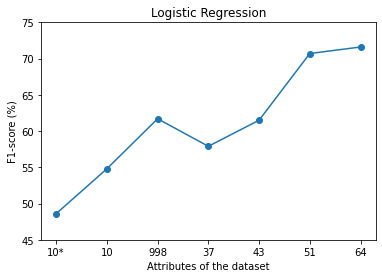

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
 
 
x = ("10*",'10', '998', '37', '43', '51', '64')
y = (48.6, 54.8, 61.7, 57.9, 61.5, 70.7, 71.6)

# plot
plt.plot( x, y, linestyle='-', marker='o')
plt.title('Logistic Regression')
plt.ylabel('F1-score (%)')
plt.xlabel('Attributes of the dataset')
plt.ylim(45, 75)
plt.show()

# XGBoost

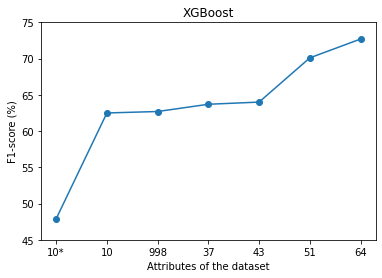

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
 
 
x = ('10*','10', '998', '37', '43', '51', '64')
y = (47.9, 62.5, 62.7, 63.7, 64, 70.1, 72.7)

# plot
plt.plot( x, y, linestyle='-', marker='o')
plt.title('XGBoost')
plt.ylabel('F1-score (%)')
plt.xlabel('Attributes of the dataset')
plt.ylim(45, 75)
plt.show()

# SVM

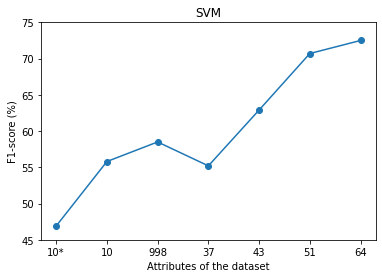

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
 
 
x = ('10*', '10', '998', '37', '43', '51', '64')
y = (46.9, 55.8, 58.5, 55.2, 62.9, 70.7, 72.5)

# plot
plt.plot( x, y, linestyle='-', marker='o')
plt.title('SVM')
plt.ylabel('F1-score (%)')
plt.xlabel('Attributes of the dataset')
plt.ylim(45, 75)
plt.show()

# Random Forest

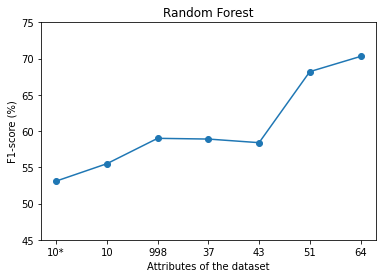

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
 
 
x = ('10*', '10', '998', '37', '43', '51', '64')
y = (53.1, 55.5, 59.0, 58.9, 58.4, 68.2, 70.3)

# plot
plt.plot( x, y, linestyle='-', marker='o')
plt.title('Random Forest')
plt.ylabel('F1-score (%)')
plt.xlabel('Attributes of the dataset')
plt.ylim(45, 75)
plt.show()

# GNB

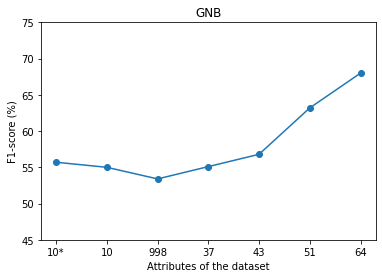

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
 
 
x = ("10*", '10', '998', '37', '43', '51', '64')
y = (55.7, 55, 53.4, 55.1, 56.8, 63.2, 68)

# plot
plt.plot( x, y, linestyle='-', marker='o')
plt.title('GNB')
plt.ylabel('F1-score (%)')
plt.xlabel('Attributes of the dataset')
plt.ylim(45, 75)
plt.show()

# kNN

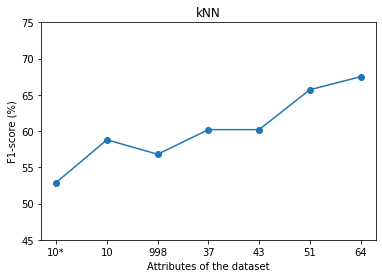

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
 
 
x = ('10*', '10', '998', '37', '43', '51', '64')
y = (52.9, 58.8, 56.8, 60.2, 60.2, 65.7, 67.5)

# plot
plt.plot( x, y, linestyle='-', marker='o')
plt.title('kNN')
plt.ylabel('F1-score (%)')
plt.xlabel('Attributes of the dataset')
plt.ylim(45, 75)
plt.show()